In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
#from IPython.display import HTML

#HTML('''<script>
#code_show=true; 
#function code_toggle() {
# if (code_show){
# $('div.input').hide();
# } else {
# $('div.input').show();
# }
# code_show = !code_show
#} 
#$( document ).ready(code_toggle);
#</script>
#<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
outdir = '/data/SO2/sio-kramosmusalem/09_globalwinds_noSVB_output/'
levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)

In [4]:
depth = ds.Depth[:]
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

LATY = ds['YG'][:]
LONX = ds['XG'][:]-360
laty = ds.YG[:,0].data
lonx = ds.XG[0,:].data-360

Z = ds['Z'][:]
Zl = ds['Zl'][:]

# centers mask
hFacC = ds['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,648)*600

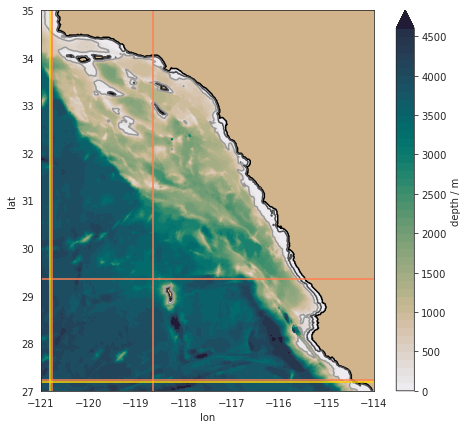

In [16]:
sns.set_style('white')
fig, ax = plt.subplots(1,1,figsize=(8,7))
ax.set_facecolor('tan')
pc = ax.contourf(LON,LAT,np.ma.masked_array(depth, mask=mask_dep),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(lon,lat,depth, colors=['0','0.3','0.6'], levels=[0,20,250])
ax.axhline(lat[150], color='coral')
ax.axvline(lon[150], color='coral')

ax.axhline(lat[14], color='coral')
ax.axvline(lon[14], color='coral')

ax.axhline(lat[12], color='gold')
ax.axvline(lon[12], color='gold')

cb.set_label('depth / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_xlim(-121,-114)
ax.set_ylim(27,35)
ax.set_aspect(1)

v, v and w at W and S open boundaries

-121.0 W


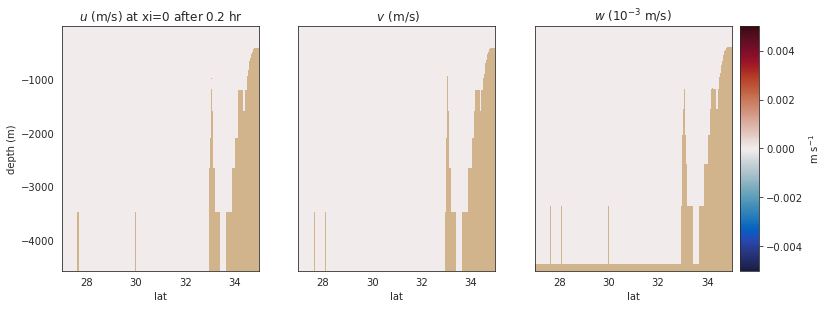

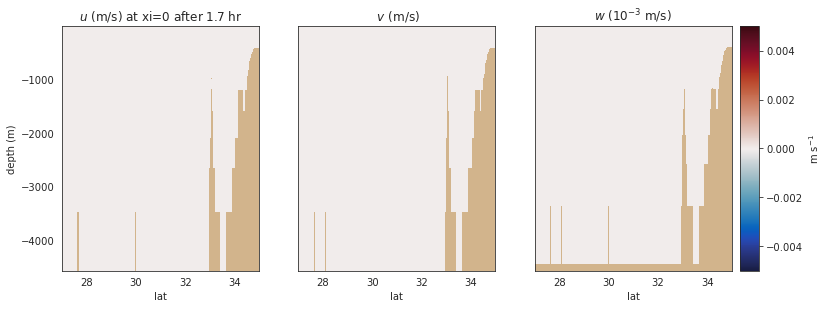

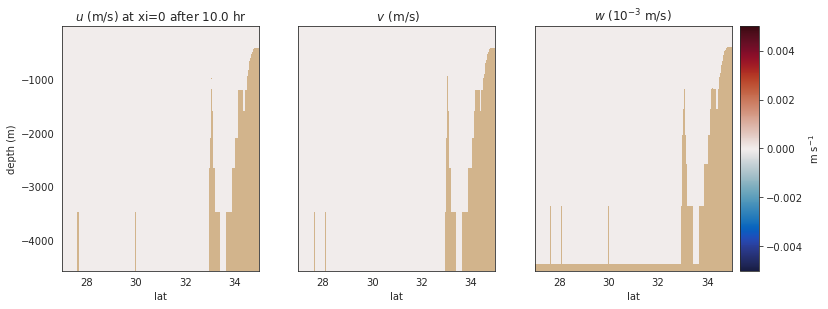

-121.0 W


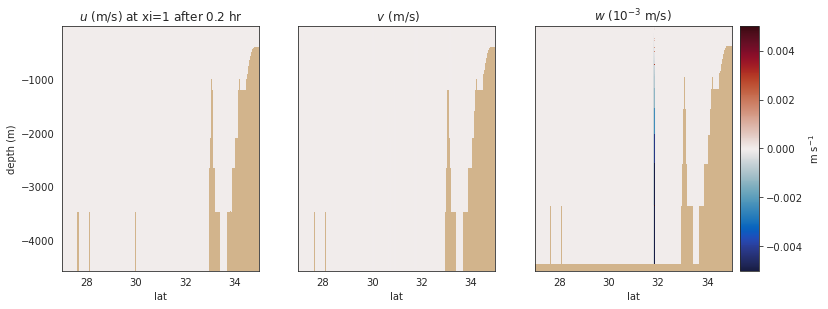

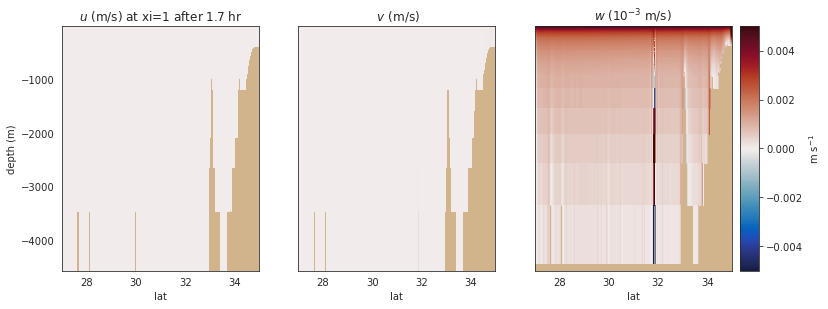

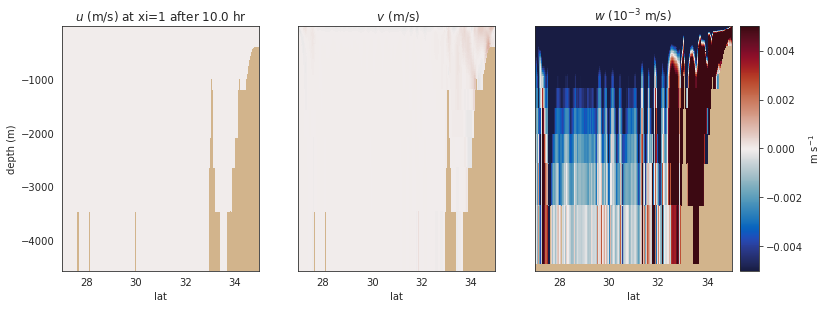

-121.0 W


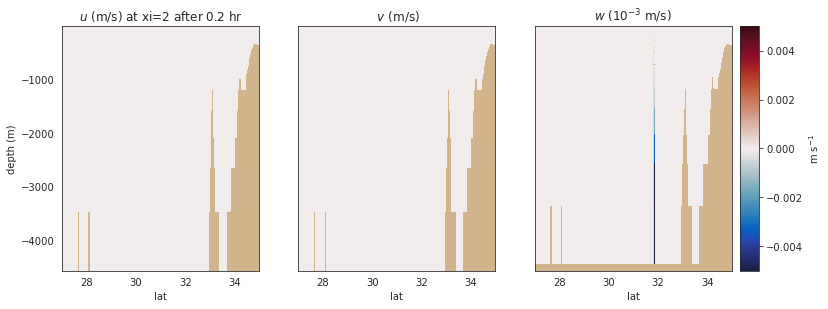

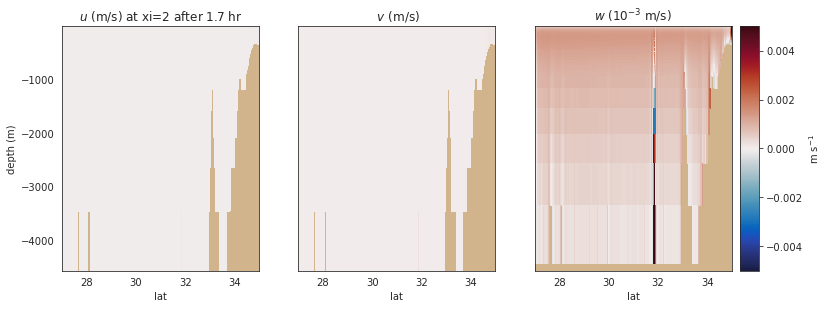

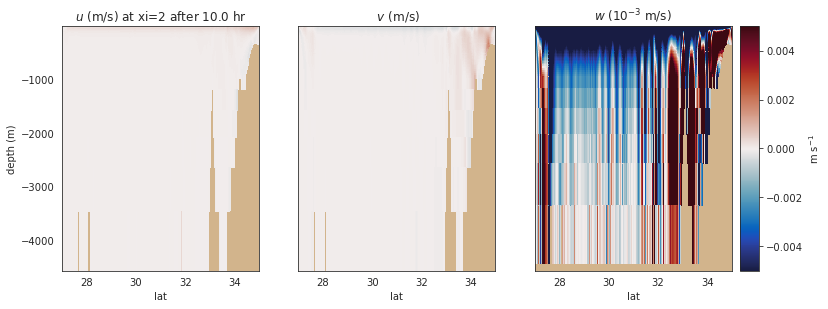

In [6]:
for xi in [0,1,2]:
    print('%1.1f W' %lon[xi])
    for ti in [1,10,60]:
        Wu = ds['UVEL'][ti,:,:,xi] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,:,xi]
        Ww = ds['WVEL'][ti,:,:,xi]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lat,Z, np.ma.masked_array(Wu, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-5E-3, vmax=5E-3)

        pc = ax1.pcolormesh(lat,Z, np.ma.masked_array(Wv, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-5E-3, vmax=5E-3)

        pc = ax2.pcolormesh(lat,Zl, np.ma.masked_array(Ww*1E3, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-5E-3, vmax=5E-3)

        norm = mpl.colors.Normalize(vmin=-5E-3, vmax=5E-3)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lat')
        ax1.set_xlabel('lat')
        ax2.set_xlabel('lat')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ (m/s) at xi=%d after %1.1f hr' %(xi,(ti*600)/(3600)))
        ax1.set_title(' $v$ (m/s)' )
        ax2.set_title('$w$ (10$^{-3}$ m/s) ')
        plt.show()


-118.6 W


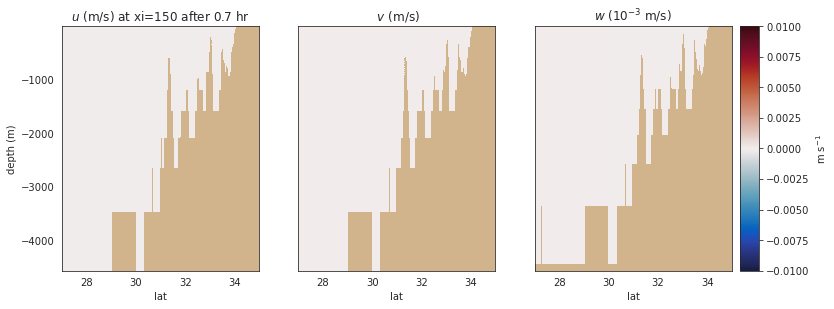

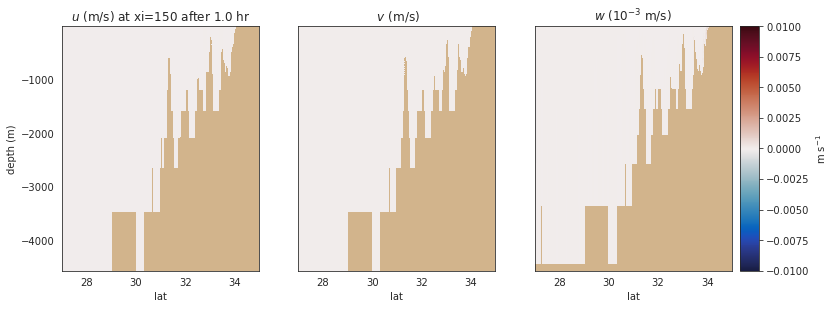

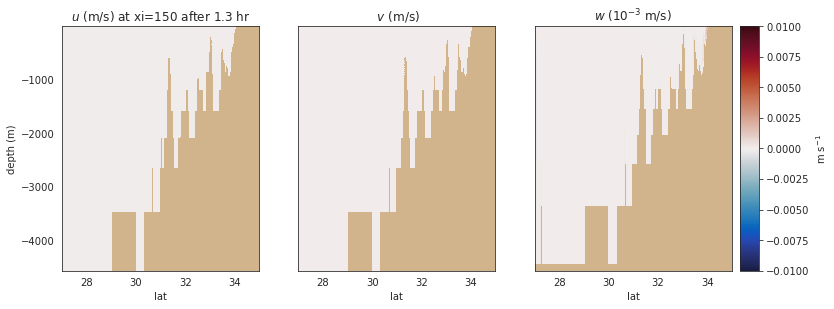

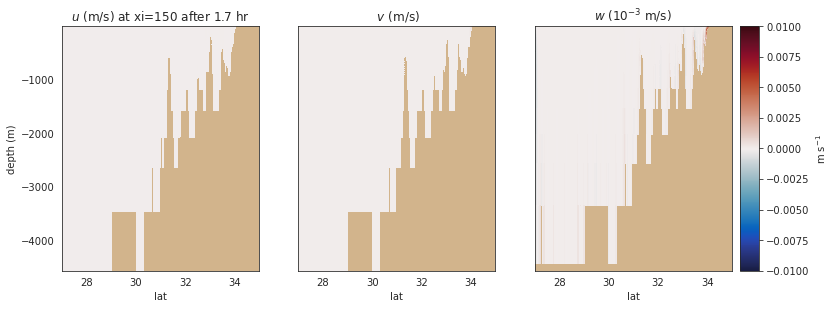

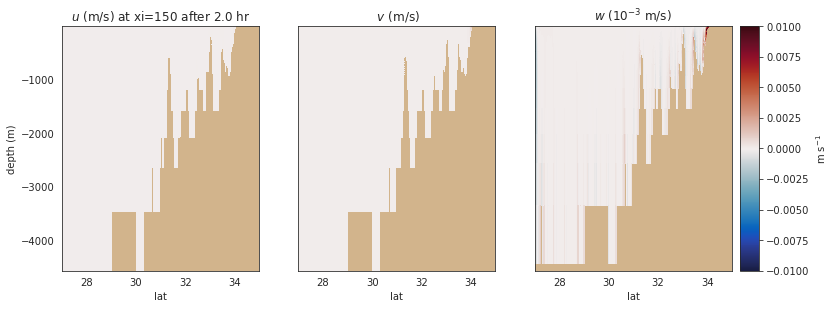

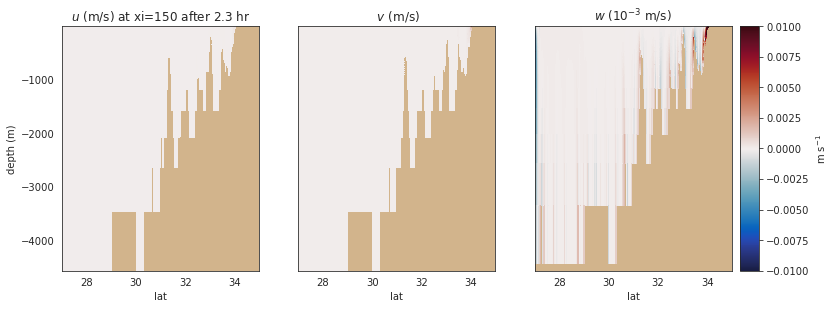

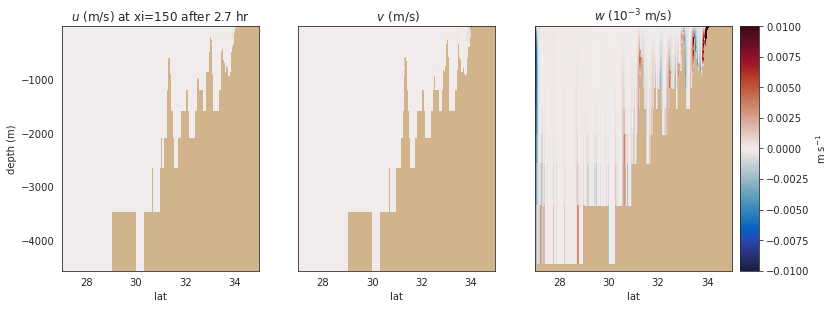

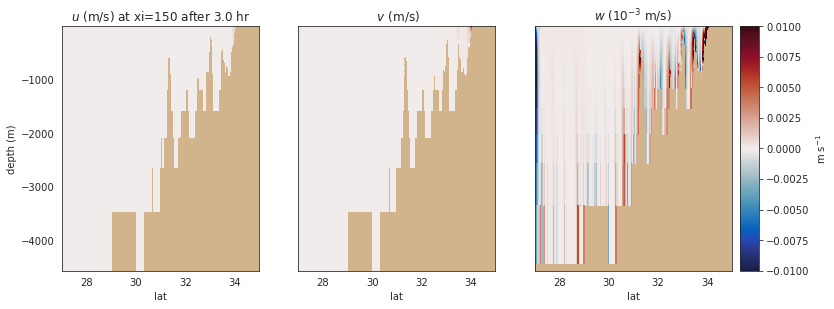

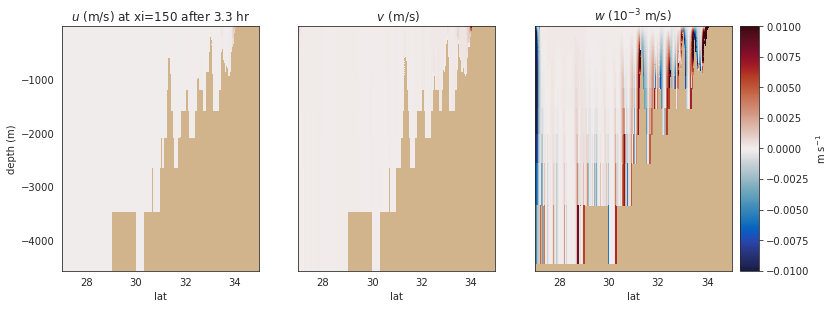

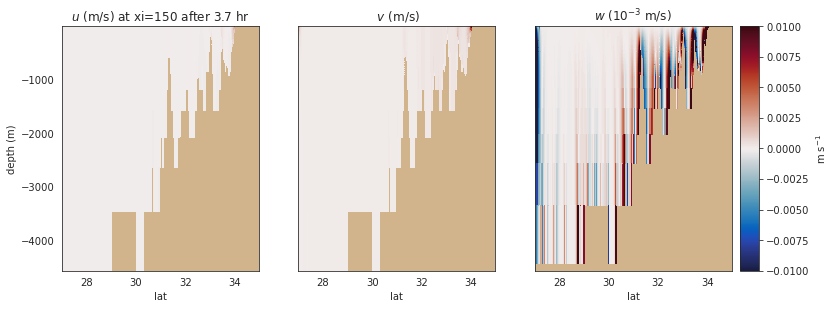

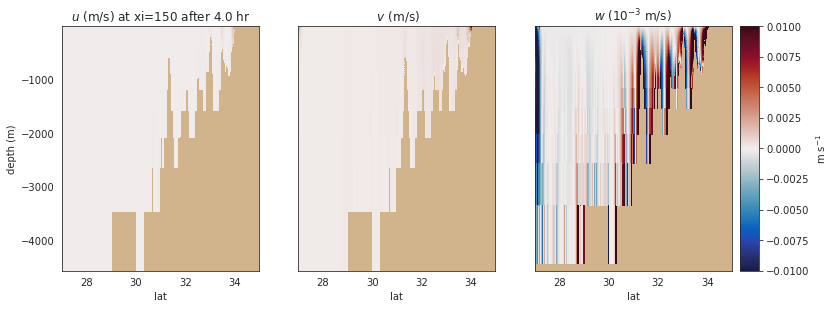

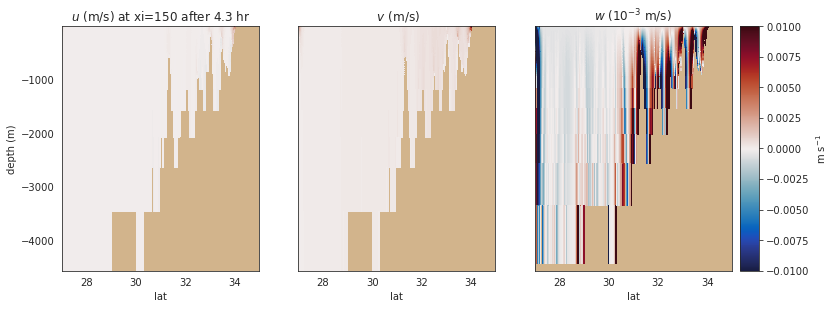

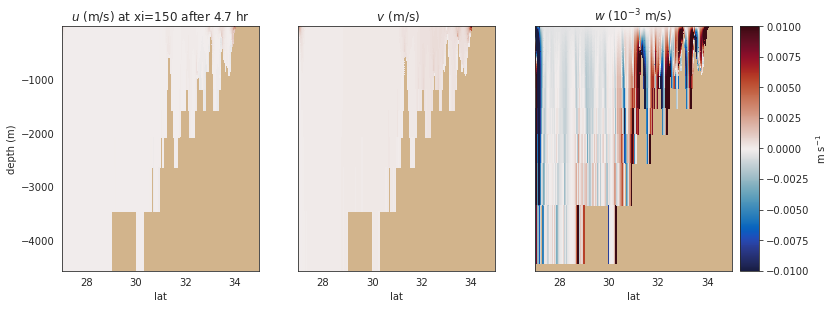

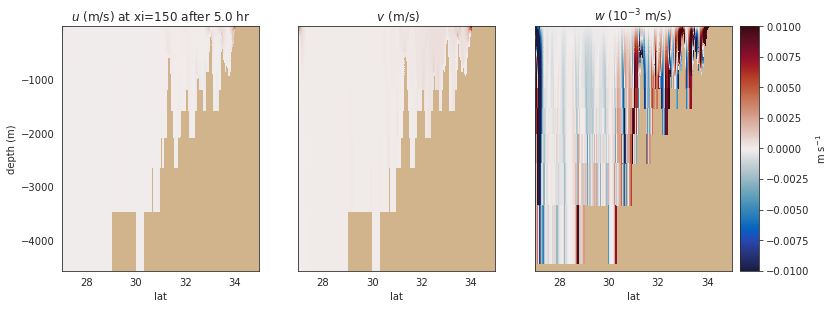

In [7]:
for xi in [150]:
    print('%1.1f W' %lon[xi])
    for ti in [4,6,8,10,12,14,16,18,20,22,24,26,28,30]:
        Wu = ds['UVEL'][ti,:,:,xi] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,:,xi]
        Ww = ds['WVEL'][ti,:,:,xi]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lat,Z, np.ma.masked_array(Wu, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        pc = ax1.pcolormesh(lat,Z, np.ma.masked_array(Wv, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        pc = ax2.pcolormesh(lat,Zl, np.ma.masked_array(Ww*1E3, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        norm = mpl.colors.Normalize(vmin=-1E-2, vmax=1E-2)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lat')
        ax1.set_xlabel('lat')
        ax2.set_xlabel('lat')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ (m/s) at xi=%d after %1.1f hr' %(xi,(ti*600)/(3600)))
        ax1.set_title(' $v$ (m/s)' )
        ax2.set_title('$w$ (10$^{-3}$ m/s) ')
        plt.show()


27.0 N


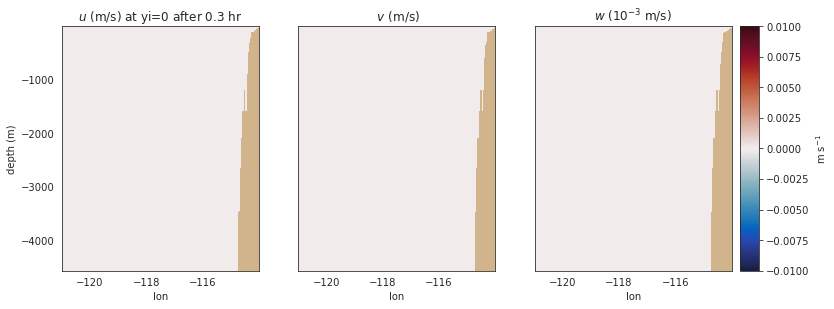

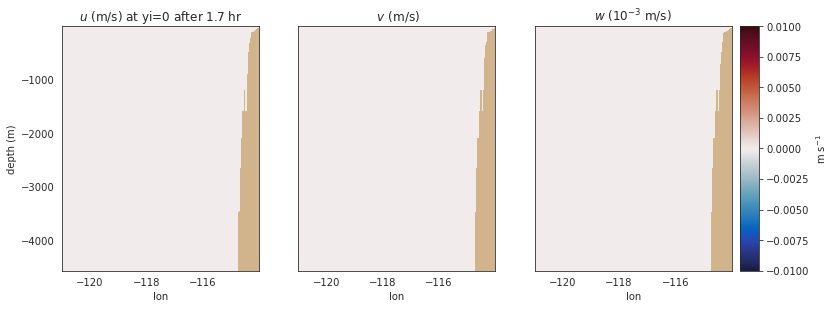

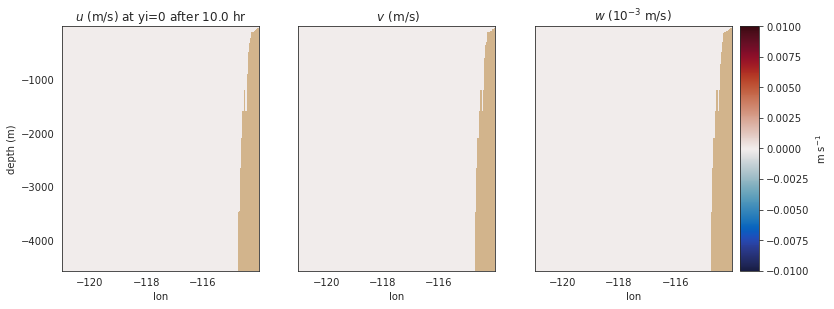

27.0 N


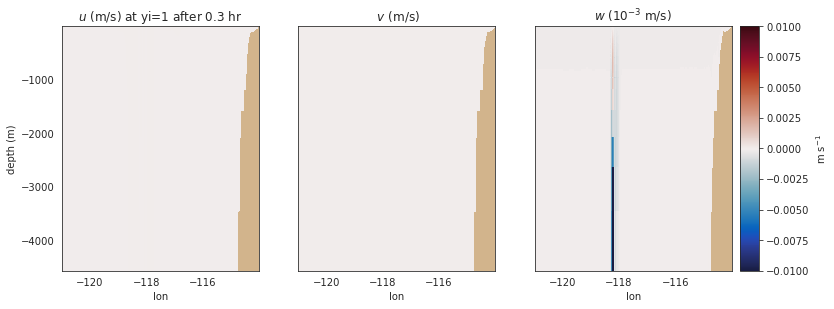

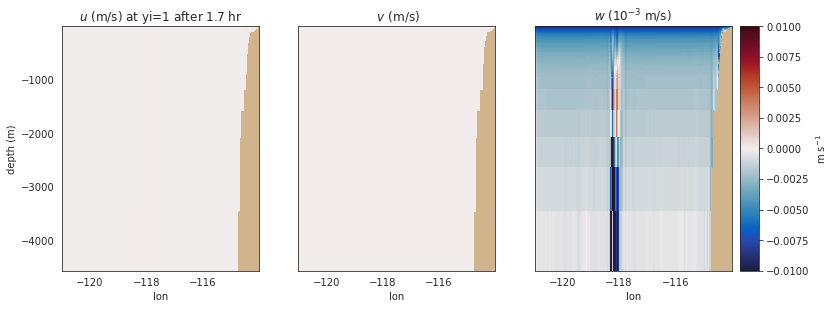

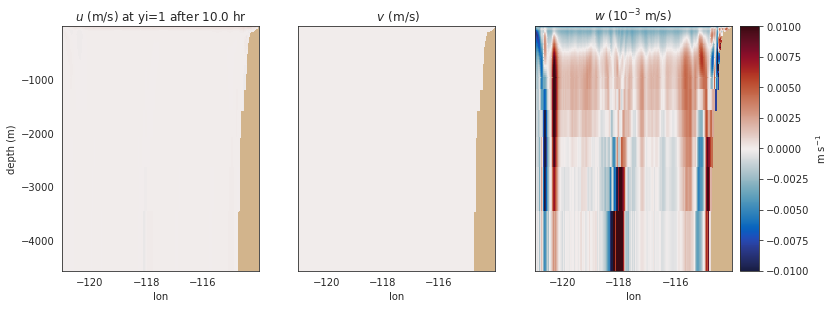

27.0 N


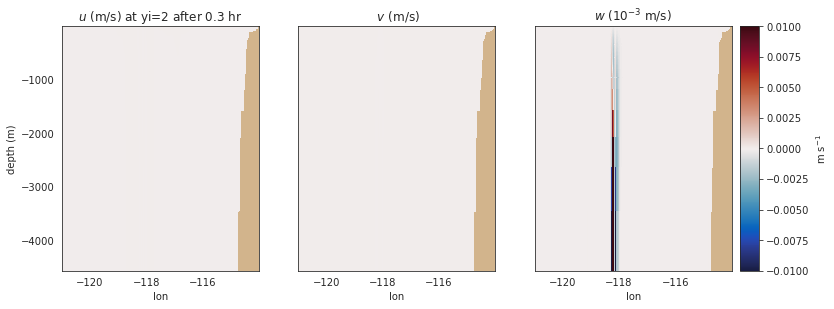

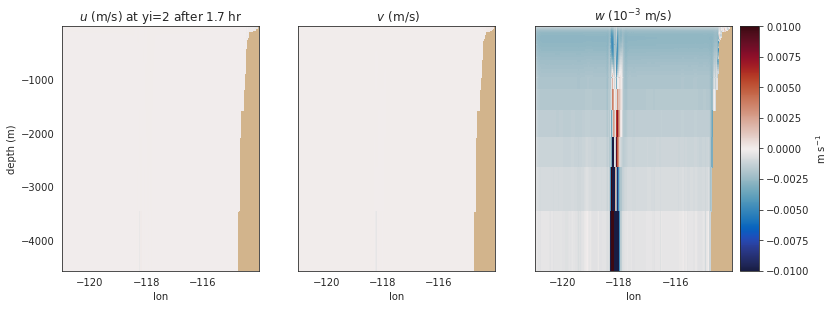

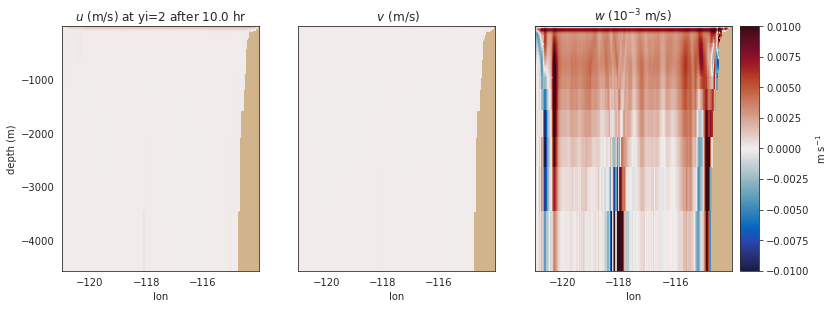

In [152]:
for yi in [0,1,2]:
    print('%1.1f N' %lat[yi])
    for ti in [2, 10, 60]:
        Wu = ds['UVEL'][ti,:,yi,:] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,yi,:]
        Ww = ds['WVEL'][ti,:,yi,:]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lon,Z, np.ma.masked_array(Wu, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        pc = ax1.pcolormesh(lon,Z, np.ma.masked_array(Wv, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        pc = ax2.pcolormesh(lon,Z, np.ma.masked_array(Ww*1E3, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        norm = mpl.colors.Normalize(vmin=-1E-2, vmax=1E-2)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lon')
        ax1.set_xlabel('lon')
        ax2.set_xlabel('lon')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ (m/s) at yi=%d after %1.1f hr' %(yi,(ti*600)/(3600)))
        ax1.set_title(' $v$ (m/s)' )
        ax2.set_title('$w$ (10$^{-3}$ m/s) ')
        plt.show()

29.4 N


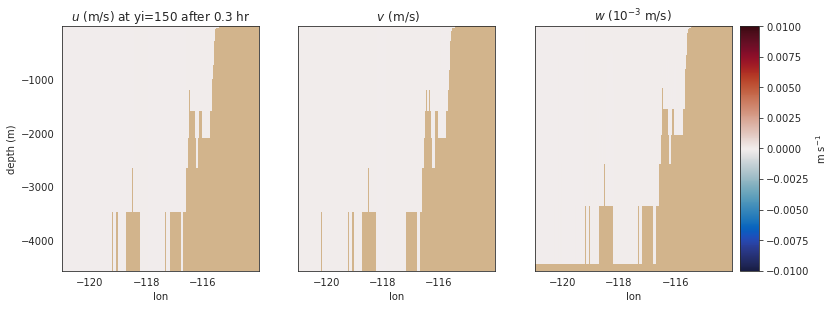

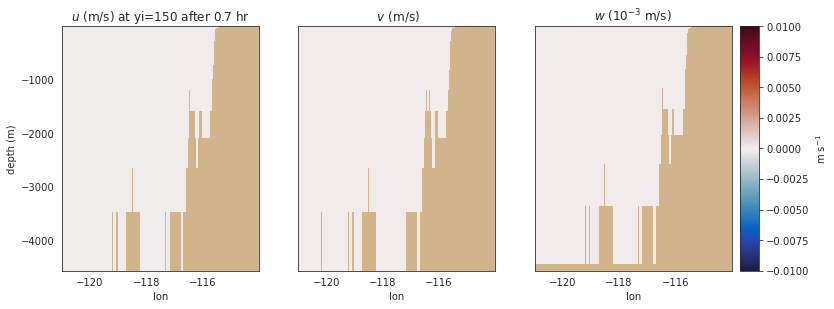

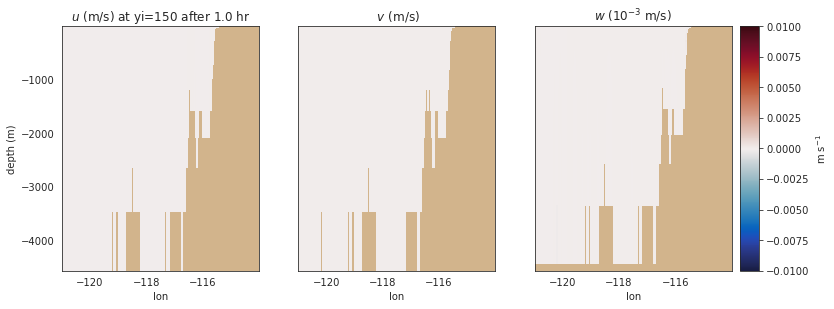

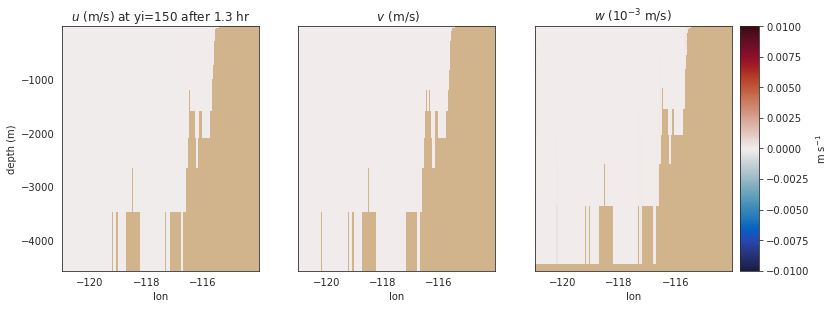

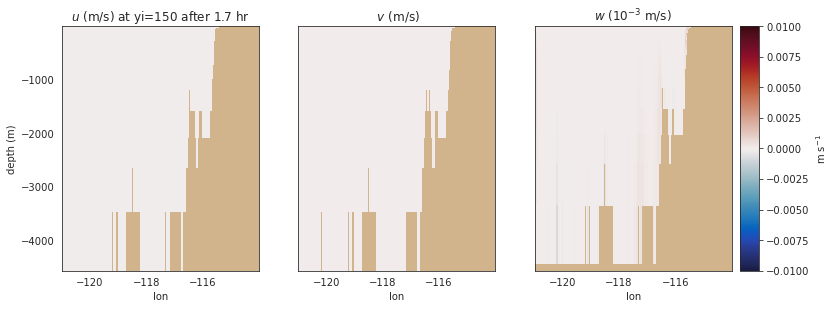

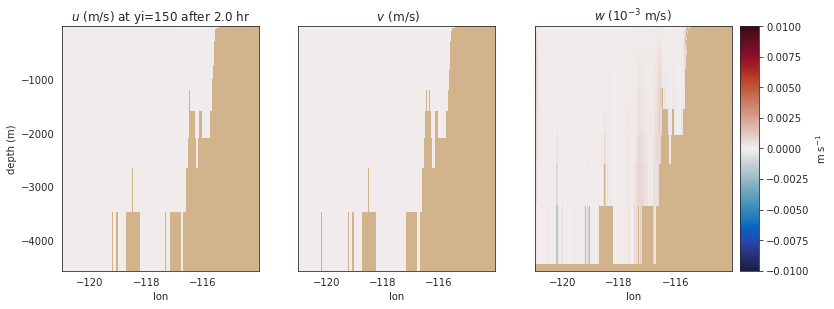

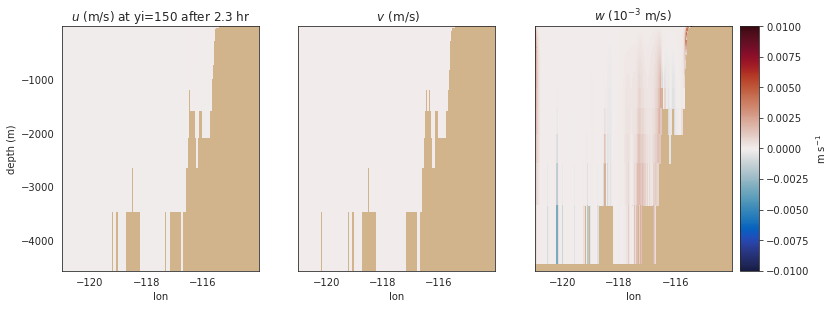

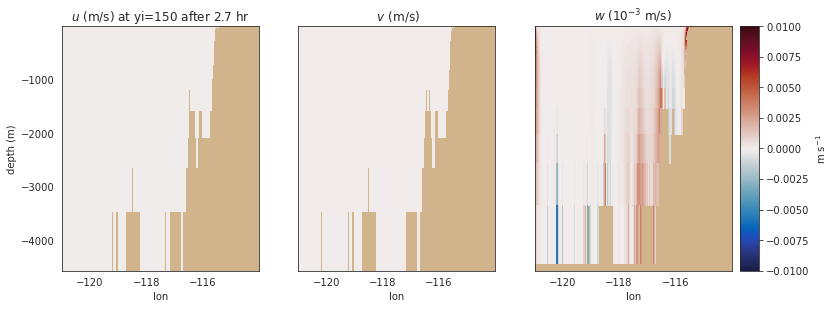

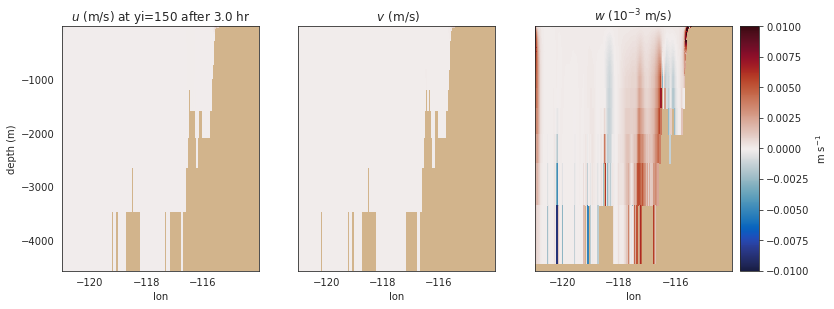

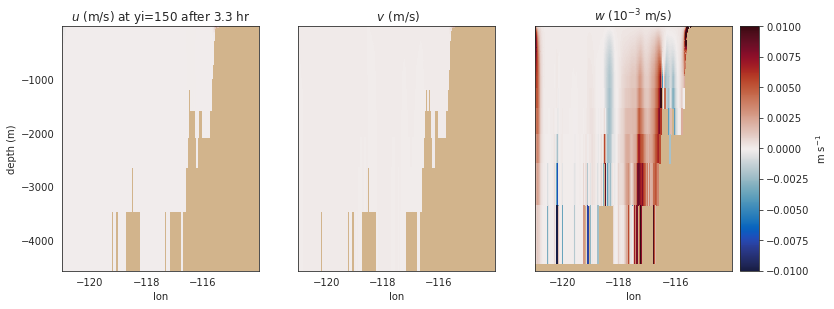

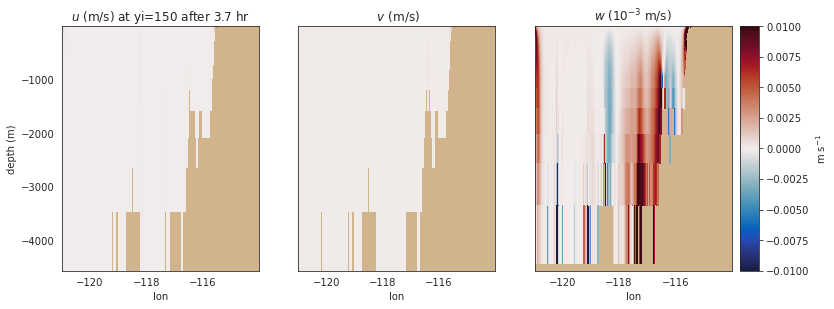

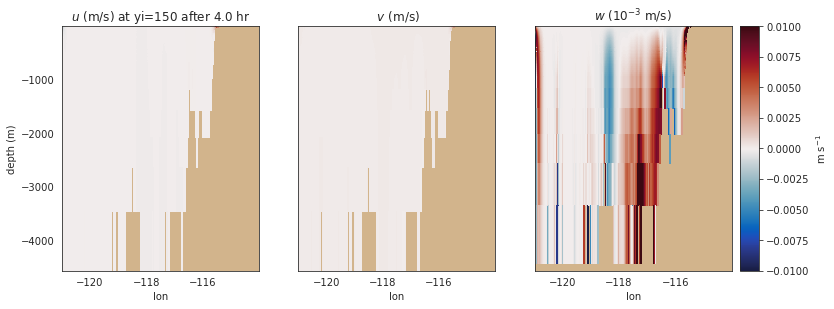

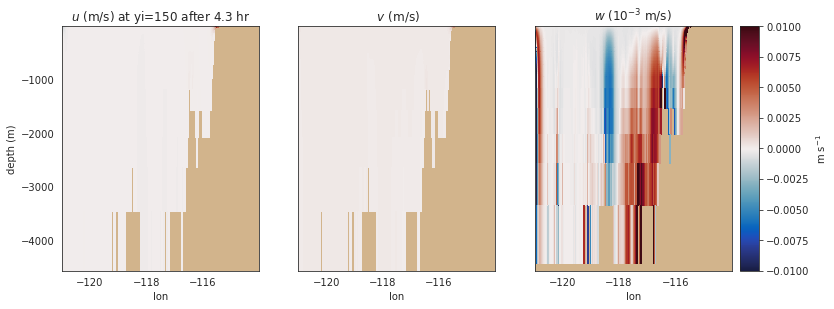

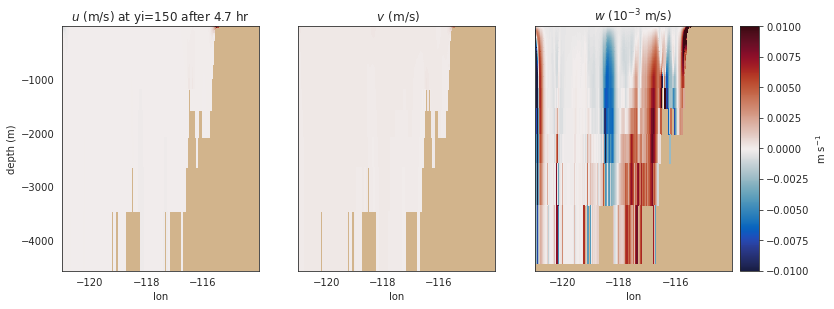

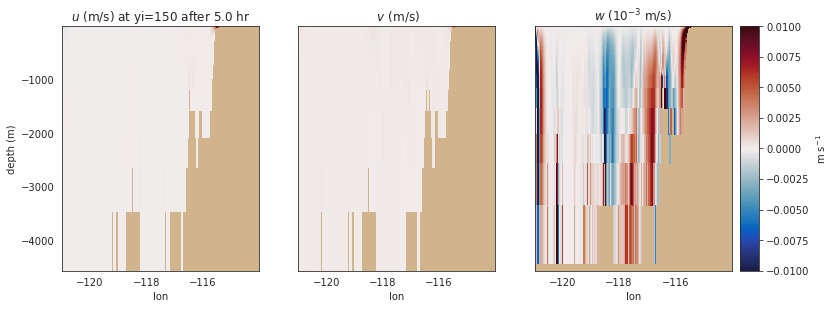

In [153]:
for yi in [150]:
    print('%1.1f N' %lat[yi])
    for ti in [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]:
        Wu = ds['UVEL'][ti,:,yi,:] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,yi,:]
        Ww = ds['WVEL'][ti,:,yi,:]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lon,Z, np.ma.masked_array(Wu, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        pc = ax1.pcolormesh(lon,Z, np.ma.masked_array(Wv, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        pc = ax2.pcolormesh(lon,Zl, np.ma.masked_array(Ww*1E3, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        norm = mpl.colors.Normalize(vmin=-1E-2, vmax=1E-2)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lon')
        ax1.set_xlabel('lon')
        ax2.set_xlabel('lon')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ (m/s) at yi=%d after %1.1f hr' %(yi,(ti*600)/(3600)))
        ax1.set_title(' $v$ (m/s)' )
        ax2.set_title('$w$ (10$^{-3}$ m/s) ')
        plt.show()

-118.6 N


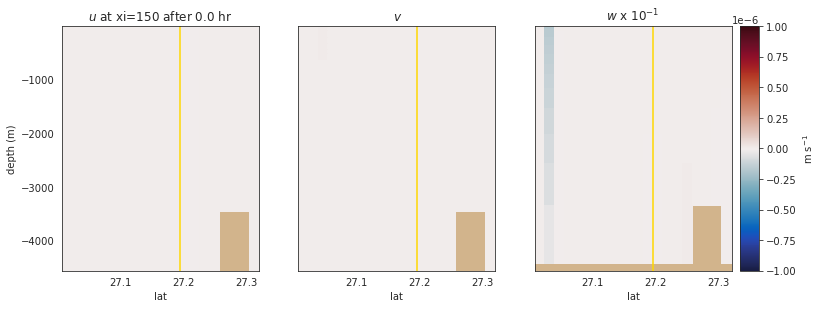

z,x indices: u[0,0]=0.000e+00, u[0,1]=8.610e-06, u[1,0]=0.000e+00, u[1,1]=4.119e-09
z,x indices: v[0,1]=0.000e+00, v[0,2]=-1.515e-05, v[1,1]=0.000e+00, v[1,2]=6.600e-09


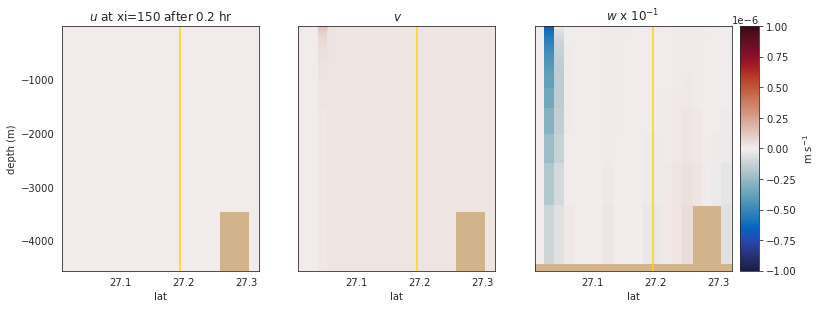

z,x indices: u[0,0]=0.000e+00, u[0,1]=3.357e-05, u[1,0]=0.000e+00, u[1,1]=3.516e-08
z,x indices: v[0,1]=0.000e+00, v[0,2]=-6.023e-05, v[1,1]=0.000e+00, v[1,2]=7.988e-08


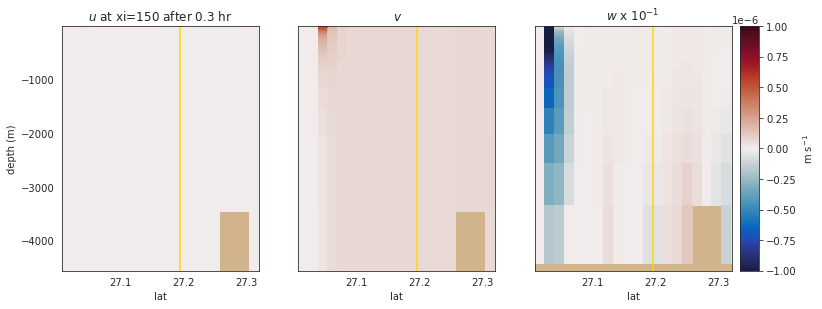

z,x indices: u[0,0]=0.000e+00, u[0,1]=8.144e-05, u[1,0]=0.000e+00, u[1,1]=1.137e-07
z,x indices: v[0,1]=0.000e+00, v[0,2]=-1.480e-04, v[1,1]=0.000e+00, v[1,2]=3.418e-07


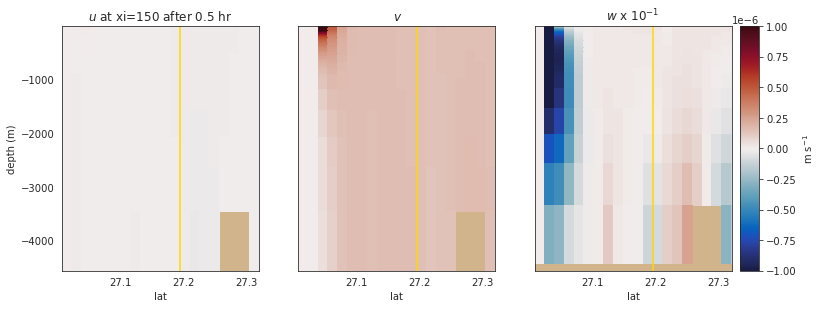

z,x indices: u[0,0]=0.000e+00, u[0,1]=1.662e-04, u[1,0]=0.000e+00, u[1,1]=2.859e-07
z,x indices: v[0,1]=0.000e+00, v[0,2]=-3.054e-04, v[1,1]=0.000e+00, v[1,2]=9.327e-07


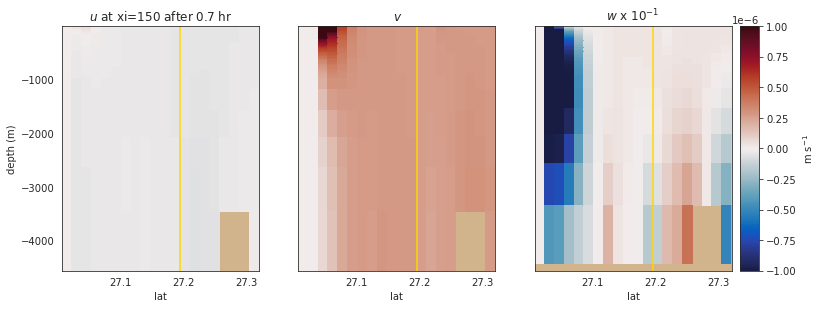

z,x indices: u[0,0]=0.000e+00, u[0,1]=2.860e-04, u[1,0]=0.000e+00, u[1,1]=6.032e-07
z,x indices: v[0,1]=0.000e+00, v[0,2]=-5.325e-04, v[1,1]=0.000e+00, v[1,2]=2.053e-06


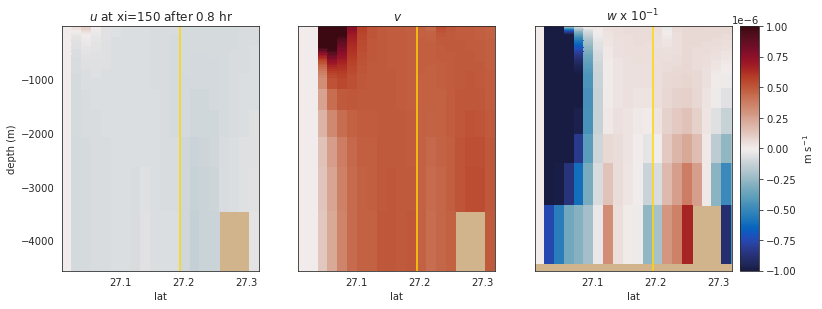

z,x indices: u[0,0]=0.000e+00, u[0,1]=4.900e-04, u[1,0]=0.000e+00, u[1,1]=1.149e-06
z,x indices: v[0,1]=0.000e+00, v[0,2]=-9.188e-04, v[1,1]=0.000e+00, v[1,2]=3.898e-06


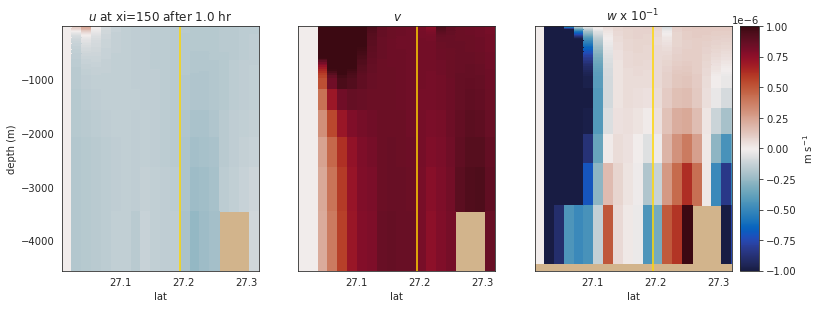

z,x indices: u[0,0]=0.000e+00, u[0,1]=8.278e-04, u[1,0]=0.000e+00, u[1,1]=2.137e-06
z,x indices: v[0,1]=0.000e+00, v[0,2]=-1.560e-03, v[1,1]=0.000e+00, v[1,2]=6.861e-06


In [6]:
for xi in [150]:
    print('%1.1f N' %lon[xi])
    for ti in [0,1,2,3,4,5,6]:
        Wu = ds['UVEL'][ti,:,:,xi] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,:,xi]
        Ww = ds['WVEL'][ti,:,:,xi]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lat,Z, np.ma.masked_array(Wu, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax0.axvline(lat[12], color='gold')
        pc = ax1.pcolormesh(lat,Z, np.ma.masked_array(Wv, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax1.axvline(lat[12], color='gold')
       
        pc = ax2.pcolormesh(lat,Zl, np.ma.masked_array(Ww*1E1, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax2.axvline(lat[12], color='gold')
       
        norm = mpl.colors.Normalize(vmin=-1E-6, vmax=1E-6)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lat')
        ax1.set_xlabel('lat')
        ax2.set_xlabel('lat')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ at xi=%d after %1.1f hr' %(xi,(ti*600)/(3600)))
        ax1.set_title(' $v$ ' )
        ax2.set_title('$w$ x $10^{-1}$')
        ax0.set_xlim(lat[0],lat[20])
        plt.show()
        print('z,x indices: u[0,0]=%1.3e, u[0,1]=%1.3e, u[1,0]=%1.3e, u[1,1]=%1.3e' %(Wu[0,0], Wu[0,1],Wu[1,0], Wu[1,1]))
        print('z,x indices: v[0,1]=%1.3e, v[0,2]=%1.3e, v[1,1]=%1.3e, v[1,2]=%1.3e' %(Wv[0,1], Wv[0,2],Wv[1,1], Wv[1,2]))        

29.4 N


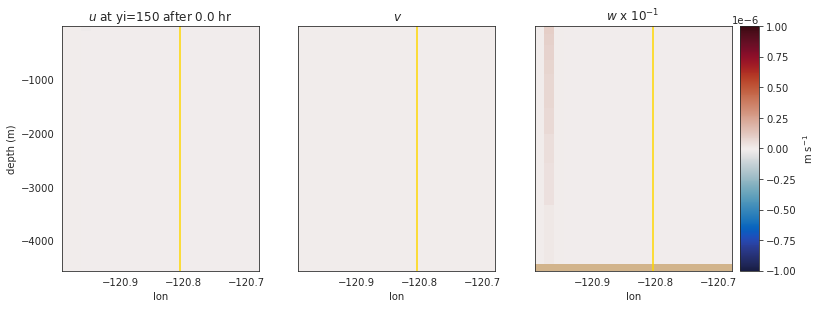

0.000e+00, 8.485e-06
0.000e+00, -1.509e-05


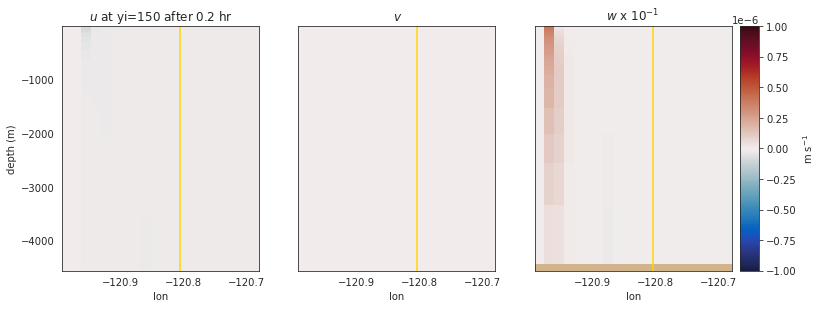

0.000e+00, 3.244e-05
0.000e+00, -5.972e-05


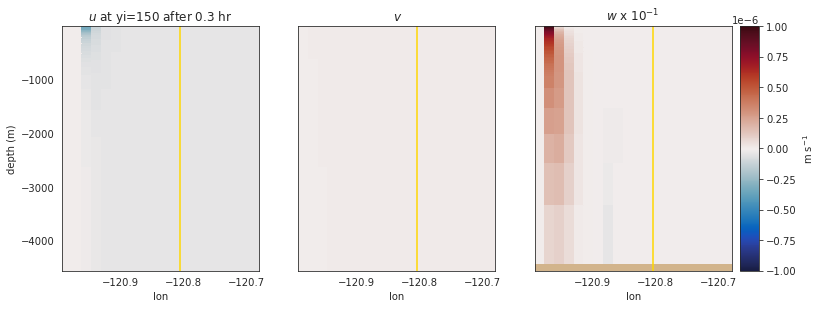

0.000e+00, 7.762e-05
0.000e+00, -1.464e-04


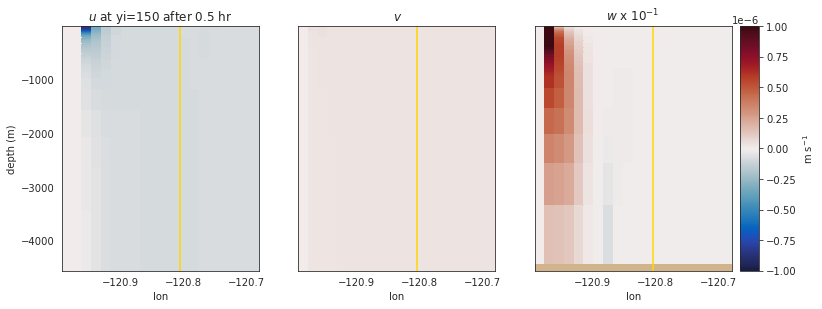

0.000e+00, 1.564e-04
0.000e+00, -3.014e-04


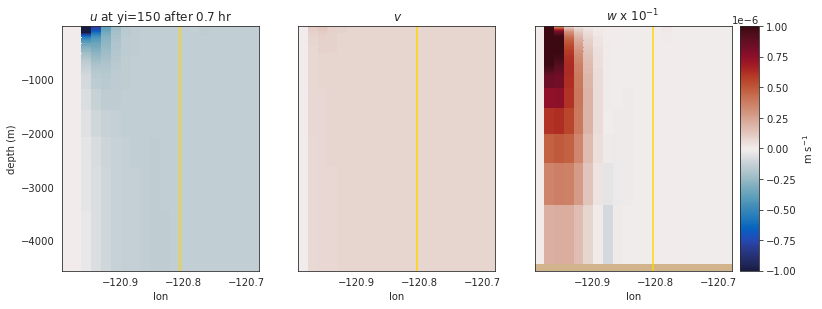

0.000e+00, 2.655e-04
0.000e+00, -5.242e-04


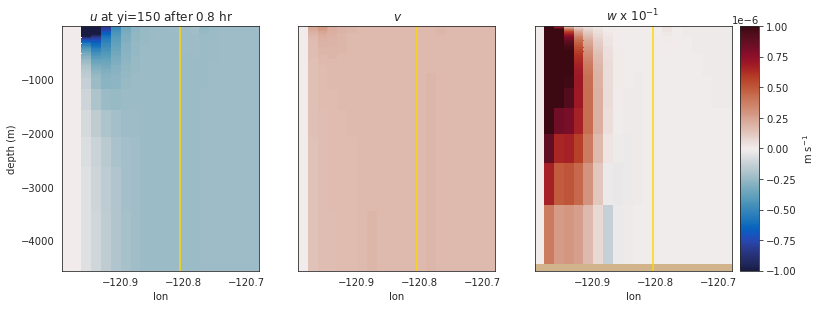

0.000e+00, 4.514e-04
0.000e+00, -9.031e-04


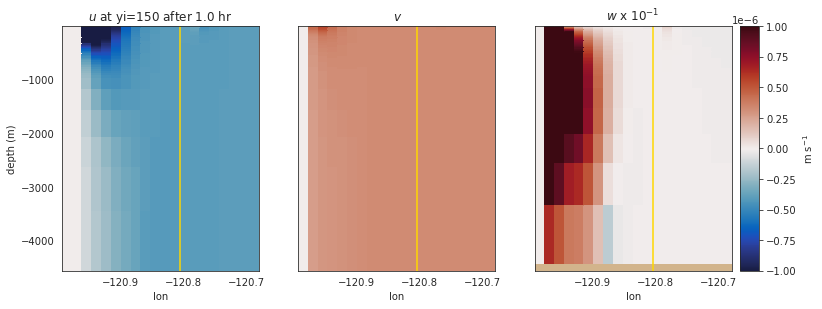

0.000e+00, 7.580e-04
0.000e+00, -1.532e-03


In [17]:
for yi in [150]:
    print('%1.1f N' %lat[yi])
    for ti in [0,1,2,3,4,5,6]:
        Wu = ds['UVEL'][ti,:,yi,:] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,yi,:]
        Ww = ds['WVEL'][ti,:,yi,:]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lon,Z, np.ma.masked_array(Wu, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax0.axvline(lon[12], color='gold')
        pc = ax1.pcolormesh(lon,Z, np.ma.masked_array(Wv, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax1.axvline(lon[12], color='gold')
       
        pc = ax2.pcolormesh(lon,Zl, np.ma.masked_array(Ww*1E1, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax2.axvline(lon[12], color='gold')
       
        norm = mpl.colors.Normalize(vmin=-1E-6, vmax=1E-6)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lon')
        ax1.set_xlabel('lon')
        ax2.set_xlabel('lon')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ at yi=%d after %1.1f hr' %(yi,(ti*600)/(3600)))
        ax1.set_title(' $v$ ' )
        ax2.set_title('$w$ x $10^{-1}$')
        ax0.set_xlim(lon[0],lon[20])
        plt.show()
        print('%1.3e, %1.3e' %(Wu[0,1], Wu[0,2]))
        print('%1.3e, %1.3e' %(Wv[0,0], Wv[0,1]))

29.4 N


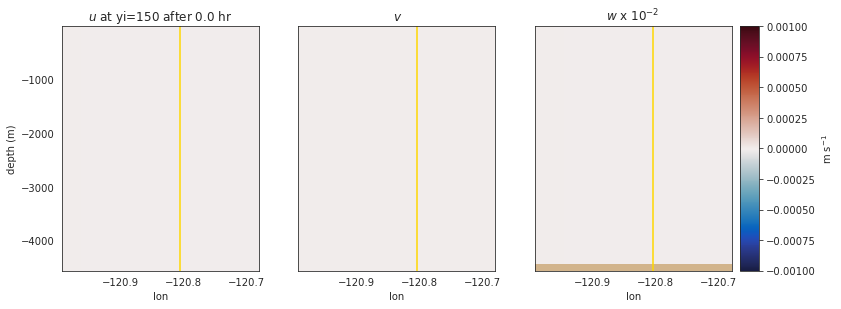

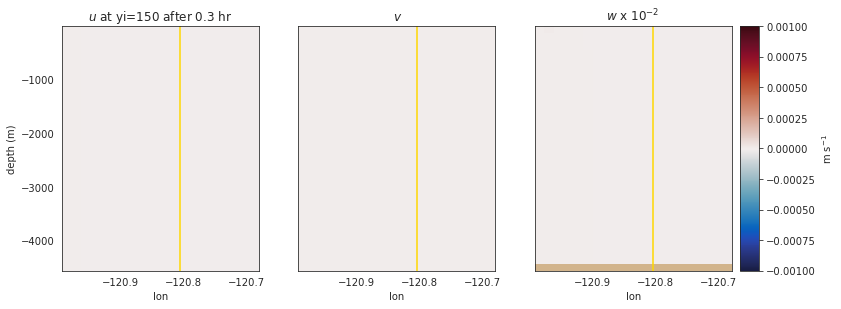

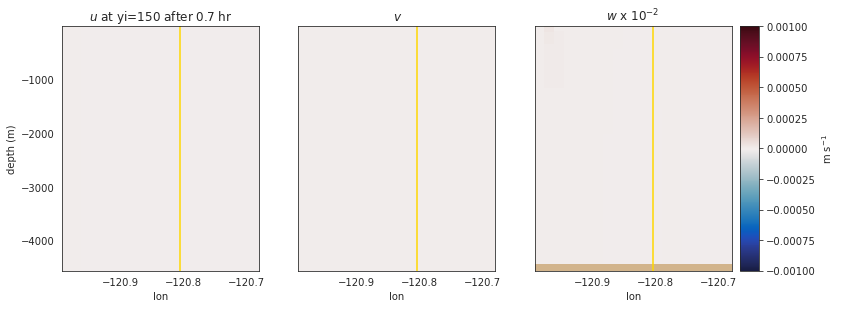

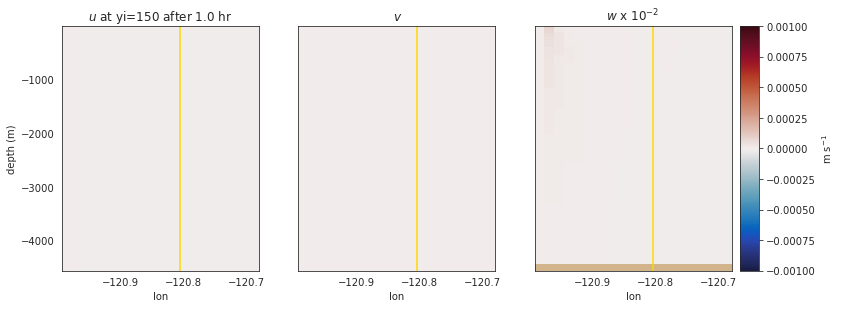

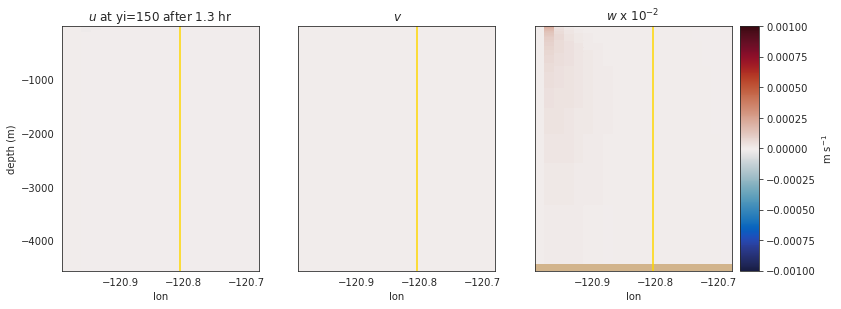

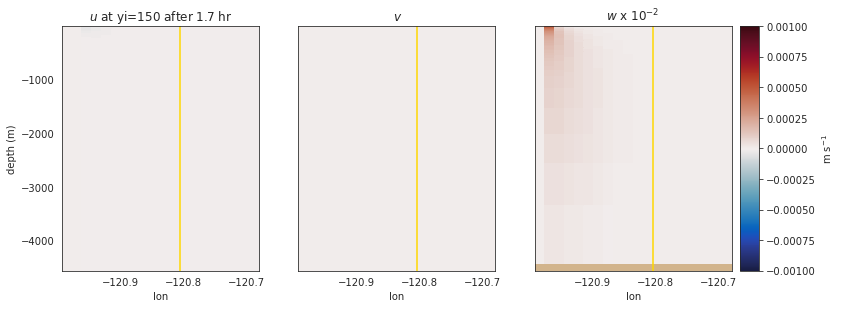

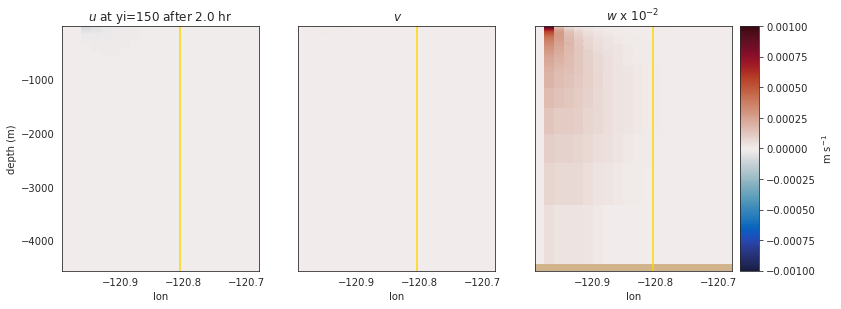

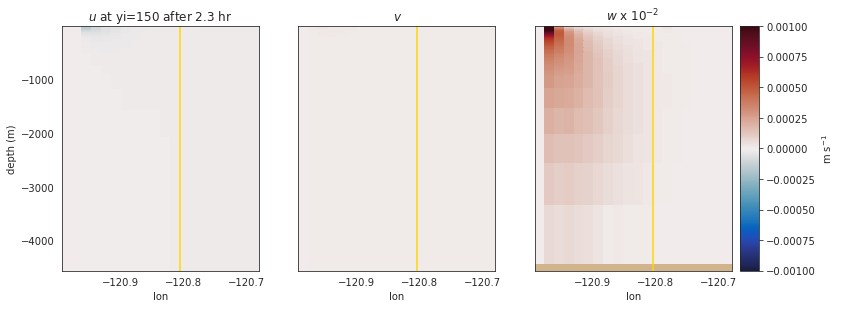

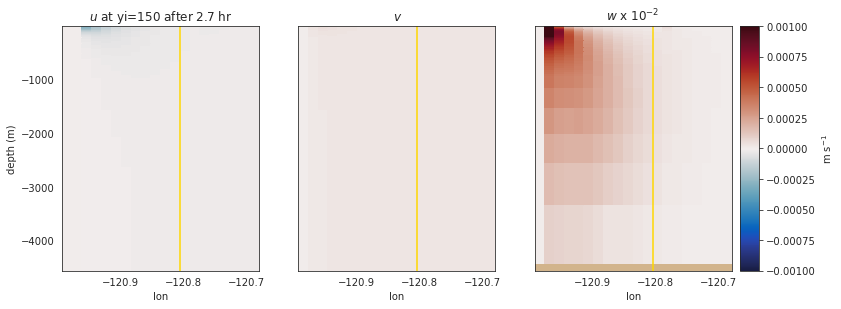

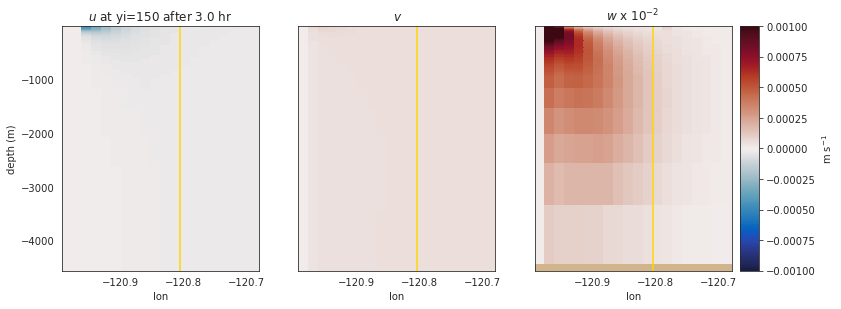

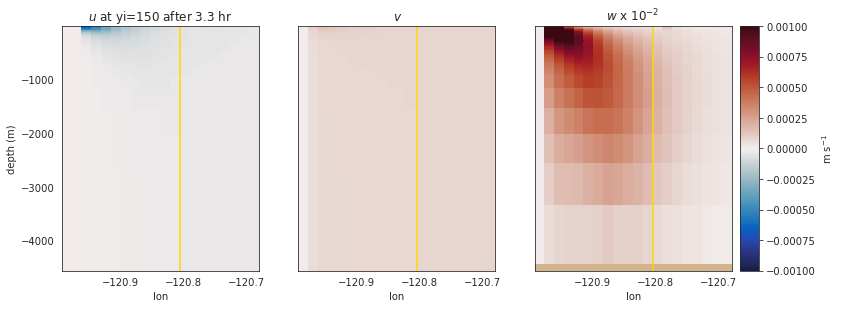

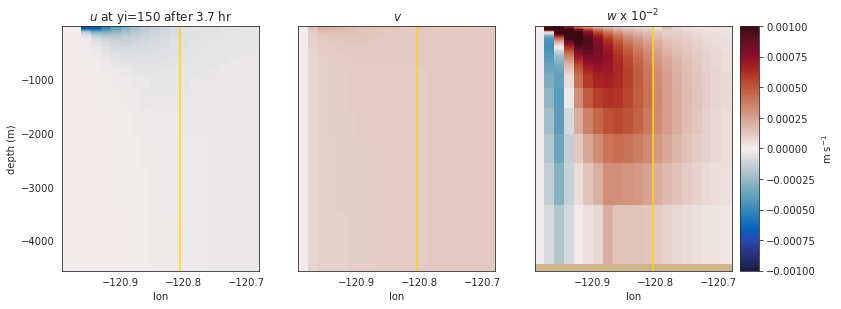

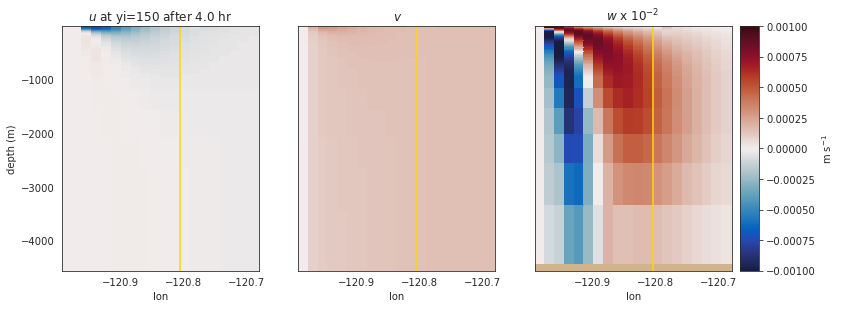

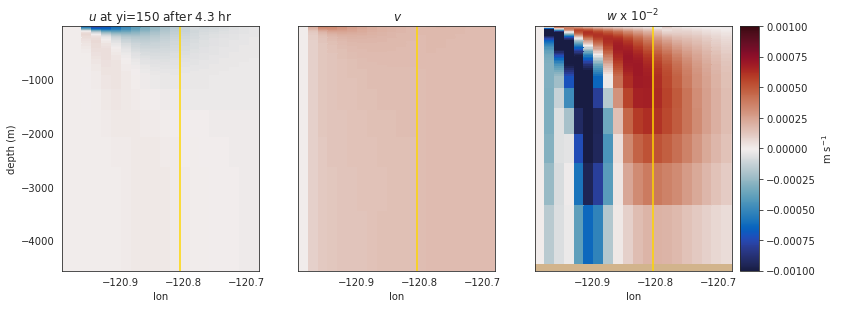

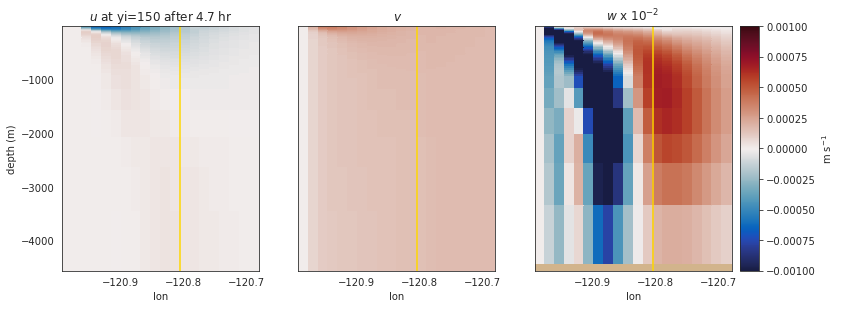

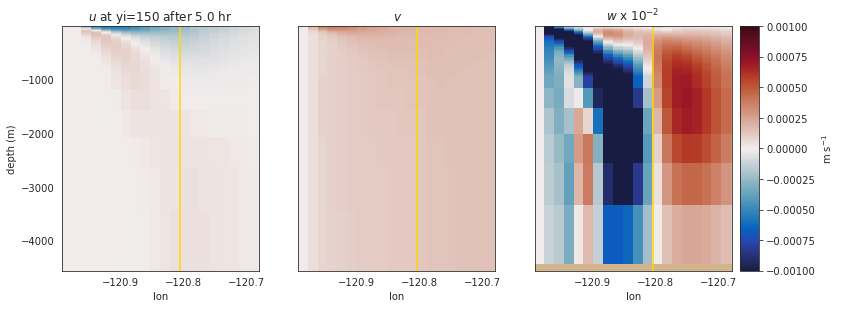

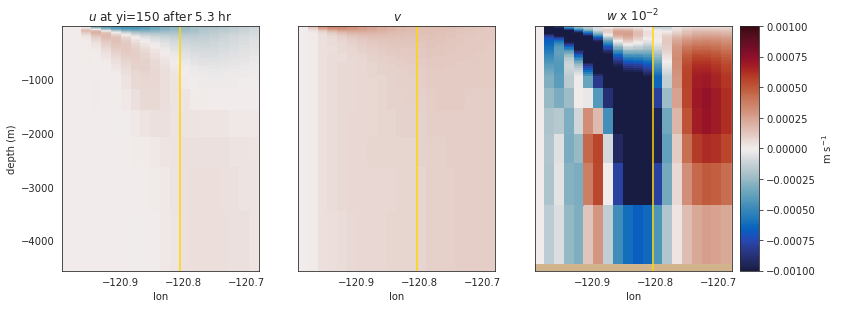

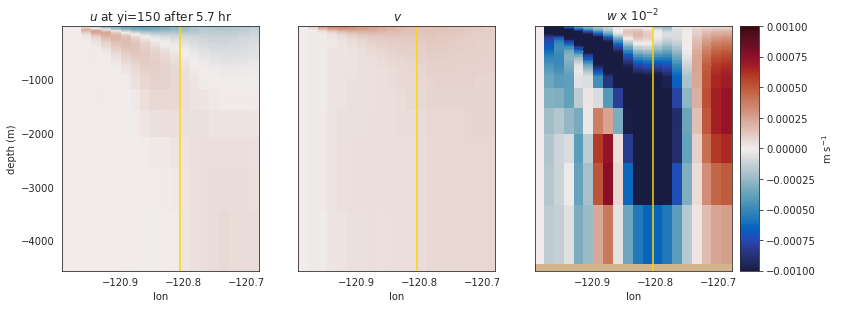

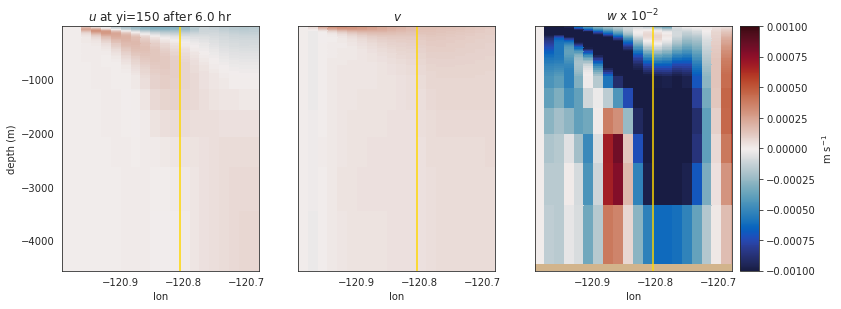

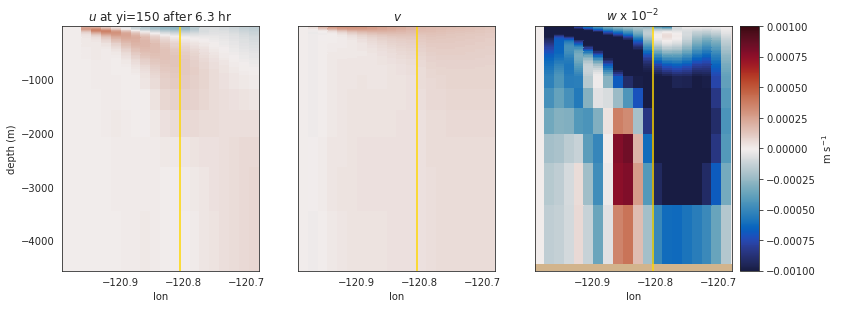

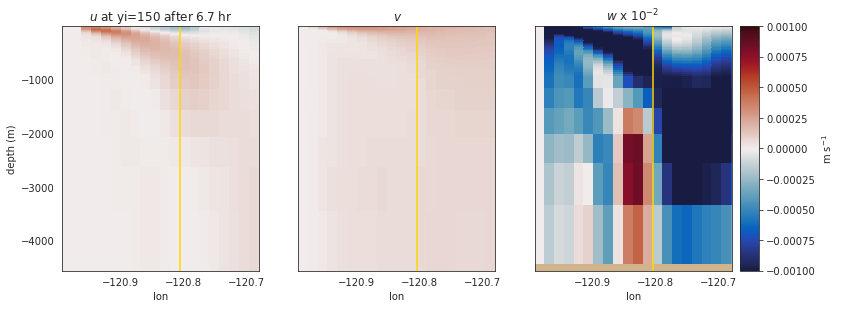

In [12]:
for yi in [150]:
    print('%1.1f N' %lat[yi])
    for ti in [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]:
        Wu = ds['UVEL'][ti,:,yi,:] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,yi,:]
        Ww = ds['WVEL'][ti,:,yi,:]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lon,Z, np.ma.masked_array(Wu, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-3, vmax=1E-3)
        ax0.axvline(lon[12], color='gold')
        pc = ax1.pcolormesh(lon,Z, np.ma.masked_array(Wv, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-3, vmax=1E-3)
        ax1.axvline(lon[12], color='gold')
       
        pc = ax2.pcolormesh(lon,Zl, np.ma.masked_array(Ww*1E2, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-3, vmax=1E-3)
        ax2.axvline(lon[12], color='gold')
       
        norm = mpl.colors.Normalize(vmin=-1E-3, vmax=1E-3)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lon')
        ax1.set_xlabel('lon')
        ax2.set_xlabel('lon')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ at yi=%d after %1.1f hr' %(yi,(ti*600)/(3600)))
        ax1.set_title(' $v$ ' )
        ax2.set_title('$w$ x $10^{-2}$')
        ax0.set_xlim(lon[0],lon[20])
        plt.show()

29.4 N


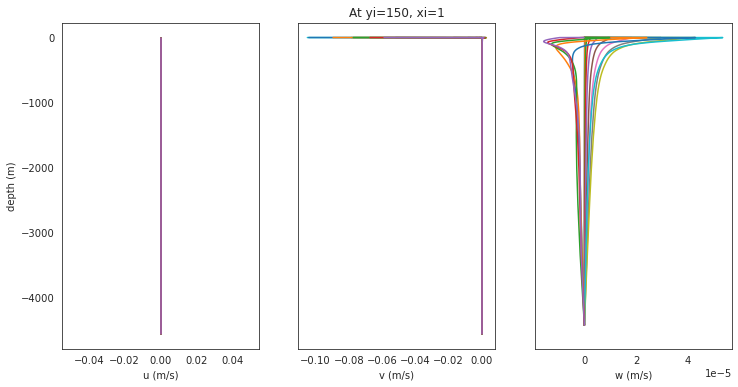

In [155]:
yi = 150
xi = 1

fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,6), sharey=True)
print('%1.1f N' %lat[yi])
for ti in [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]:
    Wu = ds['UVEL'][ti,:,yi,xi] # Remember these are 10 min averages, not snapshots
    Wv = ds['VVEL'][ti,:,yi,xi]
    Ww = ds['WVEL'][ti,:,yi,xi]

    pc = ax0.plot(Wu,Z)
    pc = ax1.plot(Wv,Z)
    pc = ax2.plot(Ww,Zl)

    ax0.set_xlabel('u (m/s)')
    ax1.set_xlabel('v (m/s)')
    ax2.set_xlabel('w (m/s)')
    ax0.set_ylabel('depth (m)')

    ax1.set_title(r'At yi=%d, xi=%d' %(yi,xi))
plt.show()

29.4 N


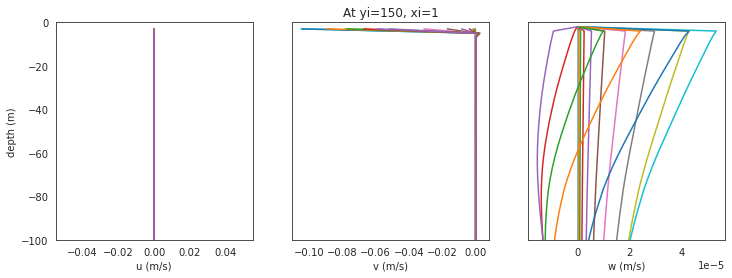

In [156]:
yi = 150
xi = 1

fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4), sharey=True)
print('%1.1f N' %lat[yi])
for ti in [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]:
    Wu = ds['UVEL'][ti,:,yi,xi] # Remember these are 10 min averages, not snapshots
    Wv = ds['VVEL'][ti,:,yi,xi]
    Ww = ds['WVEL'][ti,:,yi,xi]

    pc = ax0.plot(Wu,Z)
    pc = ax1.plot(Wv,Z)
    pc = ax2.plot(Ww,Zl)

    ax0.set_xlabel('u (m/s)')
    ax1.set_xlabel('v (m/s)')
    ax2.set_xlabel('w (m/s)')
    ax0.set_ylabel('depth (m)')
    ax0.set_ylim(-100,0)
    ax1.set_title(r'At yi=%d, xi=%d' %(yi,xi))
plt.show()

29.4 N


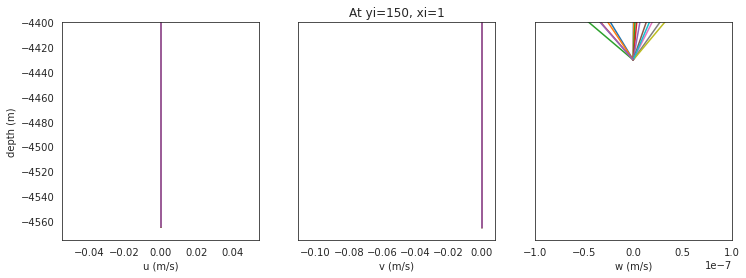

In [157]:
yi = 150
xi = 1

fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4), sharey=True)
print('%1.1f N' %lat[yi])
for ti in [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]:
    Wu = ds['UVEL'][ti,:,yi,xi] # Remember these are 10 min averages, not snapshots
    Wv = ds['VVEL'][ti,:,yi,xi]
    Ww = ds['WVEL'][ti,:,yi,xi]

    pc = ax0.plot(Wu,Z)
    pc = ax1.plot(Wv,Z)
    pc = ax2.plot(Ww,Zl)

    ax0.set_xlabel('u (m/s)')
    ax1.set_xlabel('v (m/s)')
    ax2.set_xlabel('w (m/s)')
    ax0.set_ylabel('depth (m)')
    ax0.set_ylim(-4575,-4400)
    ax2.set_xlim(-0.01E-5,0.01E-5)
    ax1.set_title(r'At yi=%d, xi=%d' %(yi,xi))
plt.show()

### Hovmöller diagrams of N-S and E-W cross-sections surface(ish)

29.4 N


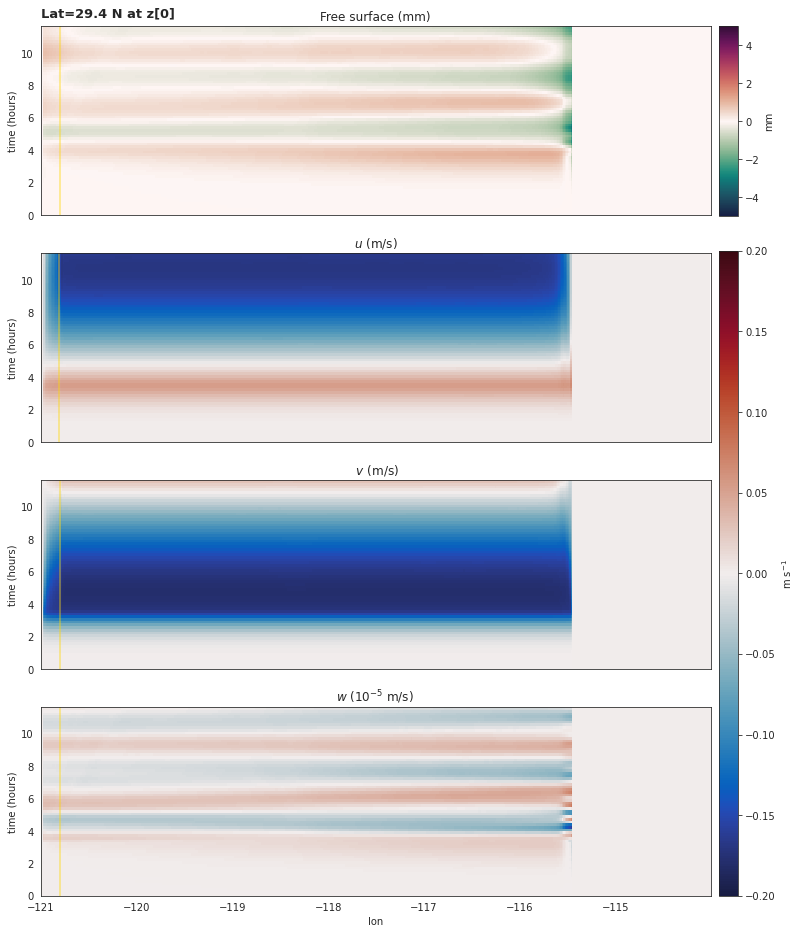

In [6]:
yi = 150
zi = 0
tf = 71
print('%1.1f N' %lat[yi])

Wu = ds['UVEL'][:tf,zi,yi,:] 
Wv = ds['VVEL'][:tf,zi,yi,:]
Ww = ds['WVEL'][:tf,zi,yi,:]
eta = ds['ETAN'][:tf,yi,:]

fig, (ax3,ax0,ax1,ax2) = plt.subplots(4,1,figsize=(12,16), sharey=True, sharex=True)

pc = ax3.pcolormesh(lon,time[:tf]/(3600), eta*1E3,
               cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax3.axvline(lon[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(lonx,time[:tf]/(3600), Wu,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axvline(lonx[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(lon,time[:tf]/(3600), Wv,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axvline(lon[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(lon,time[:tf]/(3600), Ww*1E5,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axvline(lon[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.56])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.91, 0.715, 0.022, 0.165])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='vertical',label='mm',)

ax2.set_xlabel('lon')
ax0.set_ylabel('time (hours)')
ax1.set_ylabel('time (hours)')
ax2.set_ylabel('time (hours)')
ax3.set_ylabel('time (hours)')

ax0.set_title(r'$u$ (m/s)')
ax1.set_title(' $v$ (m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax3.set_title(r'Free surface (mm)')
plt.text(0,1.05,'Lat=%1.1f N at z[0]' %lat[yi],transform=ax3.transAxes, fontweight='bold', fontsize=13)

plt.show()

29.4 N


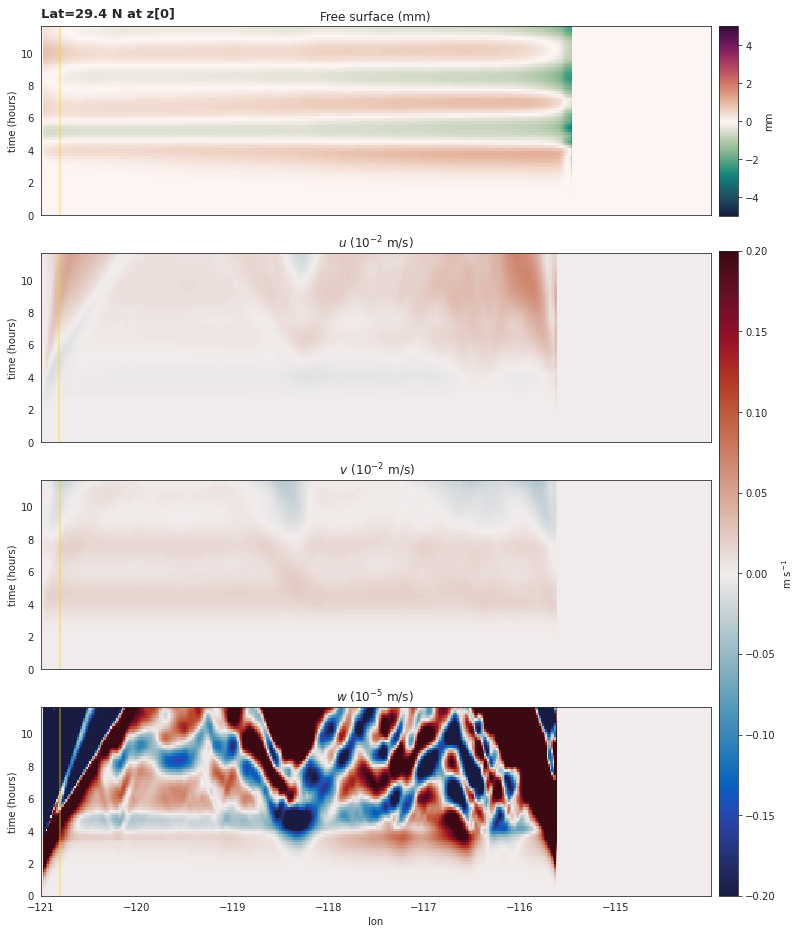

In [7]:
yi = 150
zi = 43
tf = 71
print('%1.1f N' %lat[yi])

Wu = ds['UVEL'][:tf,zi,yi,:] 
Wv = ds['VVEL'][:tf,zi,yi,:]
Ww = ds['WVEL'][:tf,zi,yi,:]
eta = ds['ETAN'][:tf,yi,:]

fig, (ax3,ax0,ax1,ax2) = plt.subplots(4,1,figsize=(12,16), sharey=True, sharex=True)

pc = ax3.pcolormesh(lon,time[:tf]/(3600), eta*1E3,
               cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax3.axvline(lon[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(lonx,time[:tf]/(3600), Wu*1E2,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axvline(lonx[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(lon,time[:tf]/(3600), Wv*1E2,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axvline(lon[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(lon,time[:tf]/(3600), Ww*1E5,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axvline(lon[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.56])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.91, 0.715, 0.022, 0.165])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='vertical',label='mm',)

ax2.set_xlabel('lon')
ax0.set_ylabel('time (hours)')
ax1.set_ylabel('time (hours)')
ax2.set_ylabel('time (hours)')
ax3.set_ylabel('time (hours)')

ax0.set_title(r'$u$ (10$^{-2}$ m/s)')
ax1.set_title(' $v$ (10$^{-2}$ m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax3.set_title(r'Free surface (mm)')
plt.text(0,1.05,'Lat=%1.1f N at z[0]' %lat[yi],transform=ax3.transAxes, fontweight='bold', fontsize=13)

plt.show()

27.2 N


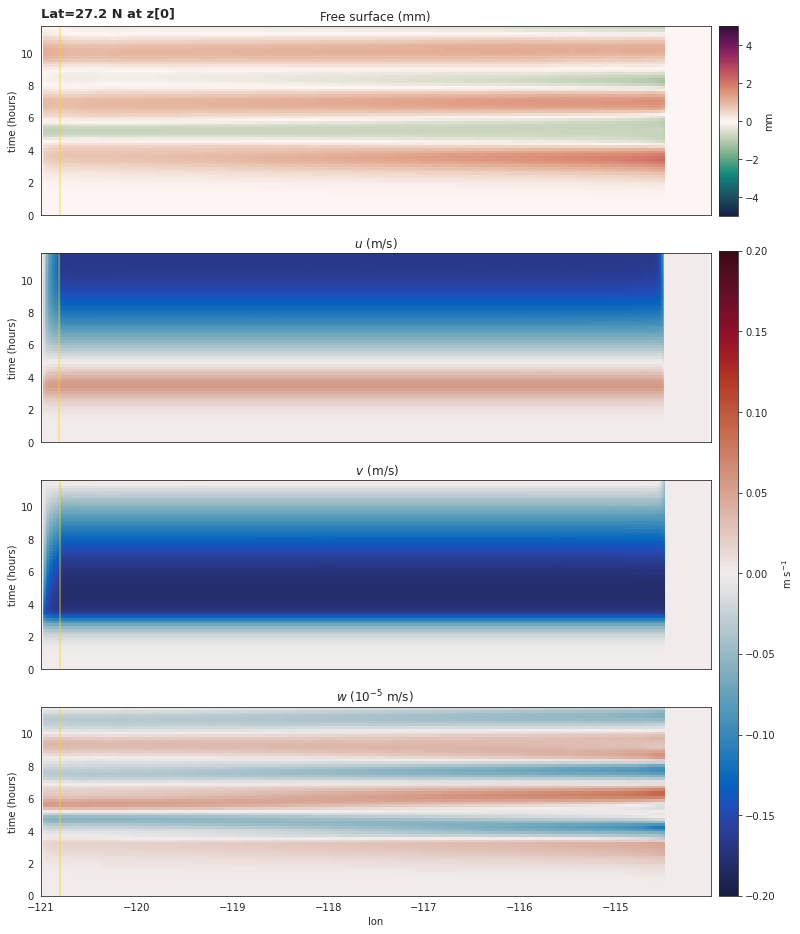

In [8]:
yi = 14
zi = 0
tf = 71
print('%1.1f N' %lat[yi])

Wu = ds['UVEL'][:tf,zi,yi,:] 
Wv = ds['VVEL'][:tf,zi,yi,:]
Ww = ds['WVEL'][:tf,zi,yi,:]
eta = ds['ETAN'][:tf,yi,:]

fig, (ax3,ax0,ax1,ax2) = plt.subplots(4,1,figsize=(12,16), sharey=True, sharex=True)

pc = ax3.pcolormesh(lon,time[:tf]/(3600), eta*1E3,
               cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax3.axvline(lon[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(lonx,time[:tf]/(3600), Wu,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axvline(lonx[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(lon,time[:tf]/(3600), Wv,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axvline(lon[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(lon,time[:tf]/(3600), Ww*1E5,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axvline(lon[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.56])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.91, 0.715, 0.022, 0.165])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='vertical',label='mm',)

ax2.set_xlabel('lon')
ax0.set_ylabel('time (hours)')
ax1.set_ylabel('time (hours)')
ax2.set_ylabel('time (hours)')
ax3.set_ylabel('time (hours)')

ax0.set_title(r'$u$ (m/s)')
ax1.set_title(' $v$ (m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax3.set_title(r'Free surface (mm)')
plt.text(0,1.05,'Lat=%1.1f N at z[0]' %lat[yi],transform=ax3.transAxes, fontweight='bold', fontsize=13)

plt.show()

27.2 N


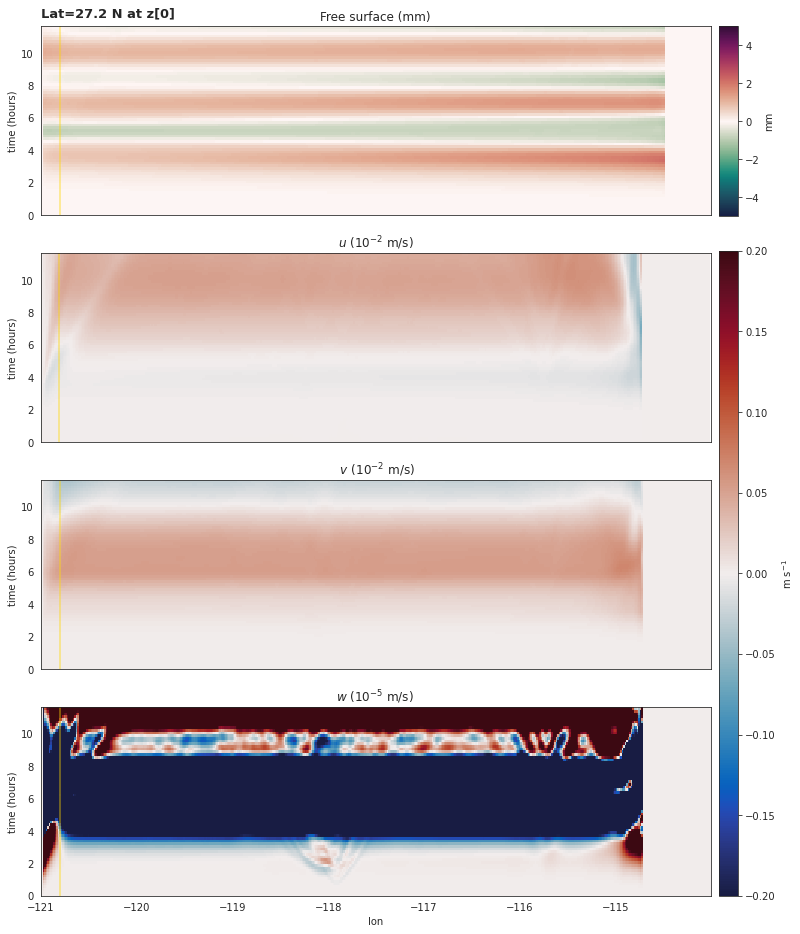

In [9]:
yi = 14
zi = 43
tf = 71
print('%1.1f N' %lat[yi])

Wu = ds['UVEL'][:tf,zi,yi,:] 
Wv = ds['VVEL'][:tf,zi,yi,:]
Ww = ds['WVEL'][:tf,zi,yi,:]
eta = ds['ETAN'][:tf,yi,:]

fig, (ax3,ax0,ax1,ax2) = plt.subplots(4,1,figsize=(12,16), sharey=True, sharex=True)

pc = ax3.pcolormesh(lon,time[:tf]/(3600), eta*1E3,
               cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax3.axvline(lon[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(lonx,time[:tf]/(3600), Wu*1E2,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axvline(lonx[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(lon,time[:tf]/(3600), Wv*1E2,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axvline(lon[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(lon,time[:tf]/(3600), Ww*1E5,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axvline(lon[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.56])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.91, 0.715, 0.022, 0.165])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='vertical',label='mm',)

ax2.set_xlabel('lon')
ax0.set_ylabel('time (hours)')
ax1.set_ylabel('time (hours)')
ax2.set_ylabel('time (hours)')
ax3.set_ylabel('time (hours)')

ax0.set_title(r'$u$ (10$^{-2}$ m/s)')
ax1.set_title(' $v$ (10$^{-2}$ m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax3.set_title(r'Free surface (mm)')
plt.text(0,1.05,'Lat=%1.1f N at z[0]' %lat[yi],transform=ax3.transAxes, fontweight='bold', fontsize=13)

plt.show()

-118.6 W


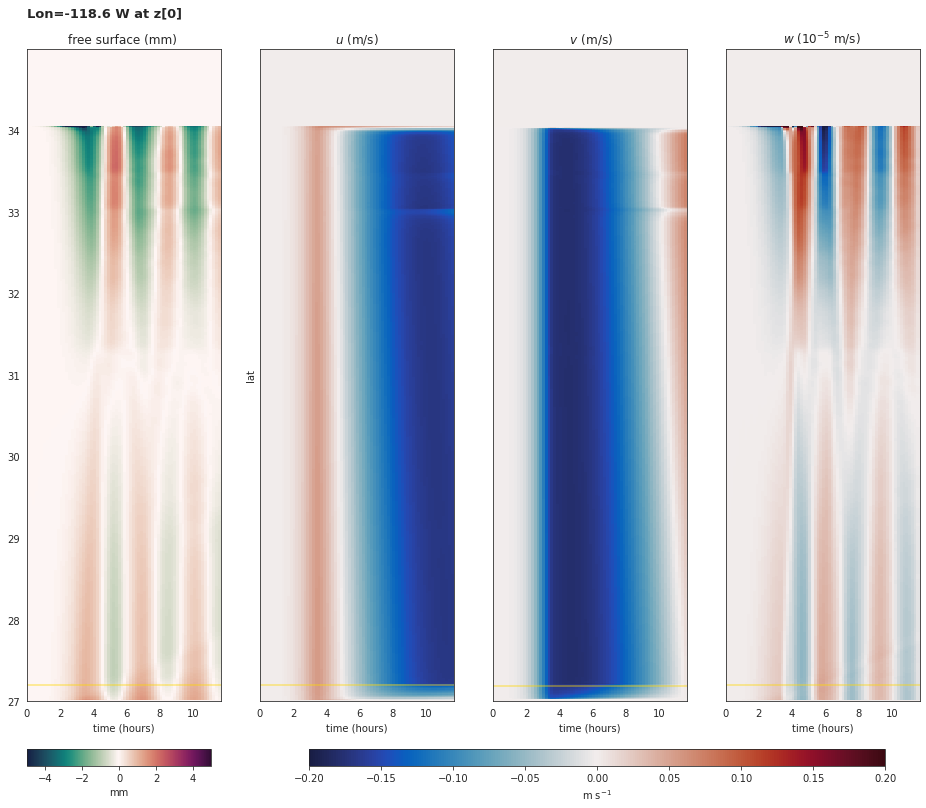

In [10]:
xi = 150
zi = 0
tf = 71
print('%1.1f W' %lon[xi])

Wu = ds['UVEL'][:tf,zi,:,xi] 
Wv = ds['VVEL'][:tf,zi,:,xi]
Ww = ds['WVEL'][:tf,zi,:,xi]
eta = ds['ETAN'][:tf,:,xi]

fig, (ax4,ax0,ax1,ax2) = plt.subplots(1,4,figsize=(16,12), sharey=True, sharex=True)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax4.set_facecolor('tan')

pc = ax4.pcolormesh(time[:tf]/(3600),lat,np.transpose(eta.data)*1E3,
                    cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax4.axhline(lat[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(time[:tf]/(3600),lat,np.transpose(Wu.data),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axhline(lat[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(time[:tf]/(3600),laty, np.transpose(Wv.data),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axhline(laty[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(time[:tf]/(3600),lat, np.transpose(Ww.data*1E5),
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axhline(lat[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.37, 0.05, 0.5, 0.02])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='horizontal',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.125, 0.05, 0.16, 0.02])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='horizontal',label='mm',)

ax2.set_xlabel('time (hours)')
ax1.set_xlabel('time (hours)')
ax0.set_xlabel('time (hours)')
ax4.set_xlabel('time (hours)')
ax0.set_ylabel('lat')

ax0.set_title(r'$u$ (m/s)')
ax1.set_title(' $v$ (m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax4.set_title('free surface (mm) ')

plt.text(0,1.05,'Lon=%1.1f W at z[0]' %lon[xi],transform=ax4.transAxes, fontweight='bold', fontsize=13)
plt.show()

-118.6 W


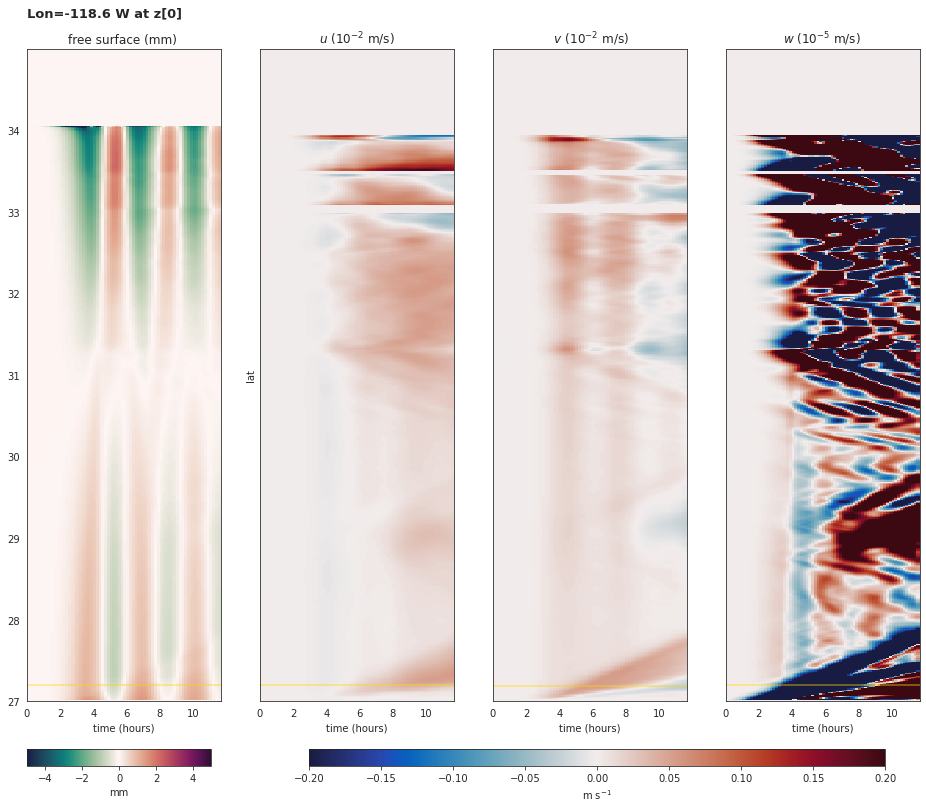

In [11]:
xi = 150
zi = 43
tf = 71
print('%1.1f W' %lon[xi])

Wu = ds['UVEL'][:tf,zi,:,xi] 
Wv = ds['VVEL'][:tf,zi,:,xi]
Ww = ds['WVEL'][:tf,zi,:,xi]
eta = ds['ETAN'][:tf,:,xi]

fig, (ax4,ax0,ax1,ax2) = plt.subplots(1,4,figsize=(16,12), sharey=True, sharex=True)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax4.set_facecolor('tan')

pc = ax4.pcolormesh(time[:tf]/(3600),lat,np.transpose(eta.data)*1E3,
                    cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax4.axhline(lat[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(time[:tf]/(3600),lat,np.transpose(Wu.data*1E2),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axhline(lat[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(time[:tf]/(3600),laty, np.transpose(Wv.data*1E2),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axhline(laty[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(time[:tf]/(3600),lat, np.transpose(Ww.data*1E5),
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axhline(lat[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.37, 0.05, 0.5, 0.02])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='horizontal',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.125, 0.05, 0.16, 0.02])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='horizontal',label='mm',)

ax2.set_xlabel('time (hours)')
ax1.set_xlabel('time (hours)')
ax0.set_xlabel('time (hours)')
ax4.set_xlabel('time (hours)')
ax0.set_ylabel('lat')

ax0.set_title(r'$u$ (10$^{-2}$ m/s)')
ax1.set_title(' $v$ (10$^{-2}$ m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax4.set_title('free surface (mm) ')

plt.text(0,1.05,'Lon=%1.1f W at z[0]' %lon[xi],transform=ax4.transAxes, fontweight='bold', fontsize=13)
plt.show()

-120.8 W


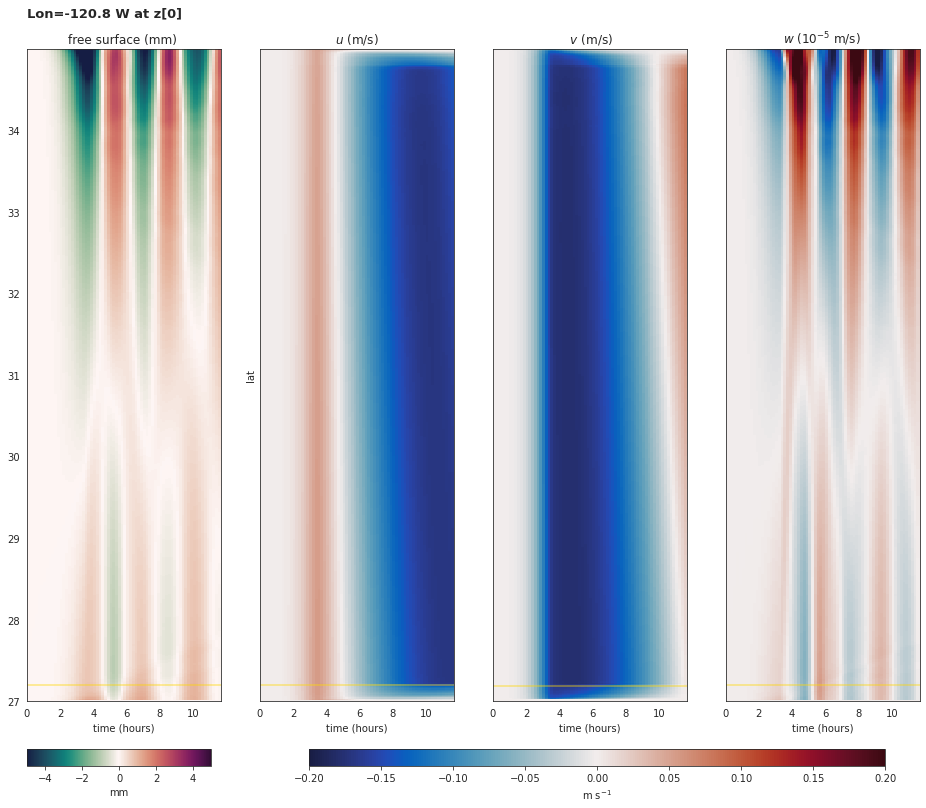

In [12]:
xi = 14
zi = 0
tf = 71
print('%1.1f W' %lon[xi])

Wu = ds['UVEL'][:tf,zi,:,xi] 
Wv = ds['VVEL'][:tf,zi,:,xi]
Ww = ds['WVEL'][:tf,zi,:,xi]
eta = ds['ETAN'][:tf,:,xi]

fig, (ax4,ax0,ax1,ax2) = plt.subplots(1,4,figsize=(16,12), sharey=True, sharex=True)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax4.set_facecolor('tan')

pc = ax4.pcolormesh(time[:tf]/(3600),lat,np.transpose(eta.data)*1E3,
                    cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax4.axhline(lat[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(time[:tf]/(3600),lat,np.transpose(Wu.data),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axhline(lat[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(time[:tf]/(3600),laty, np.transpose(Wv.data),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axhline(laty[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(time[:tf]/(3600),lat, np.transpose(Ww.data*1E5),
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axhline(lat[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.37, 0.05, 0.5, 0.02])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='horizontal',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.125, 0.05, 0.16, 0.02])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='horizontal',label='mm',)

ax2.set_xlabel('time (hours)')
ax1.set_xlabel('time (hours)')
ax0.set_xlabel('time (hours)')
ax4.set_xlabel('time (hours)')
ax0.set_ylabel('lat')

ax0.set_title(r'$u$ (m/s)')
ax1.set_title(' $v$ (m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax4.set_title('free surface (mm) ')

plt.text(0,1.05,'Lon=%1.1f W at z[0]' %lon[xi],transform=ax4.transAxes, fontweight='bold', fontsize=13)
plt.show()

-120.8 W


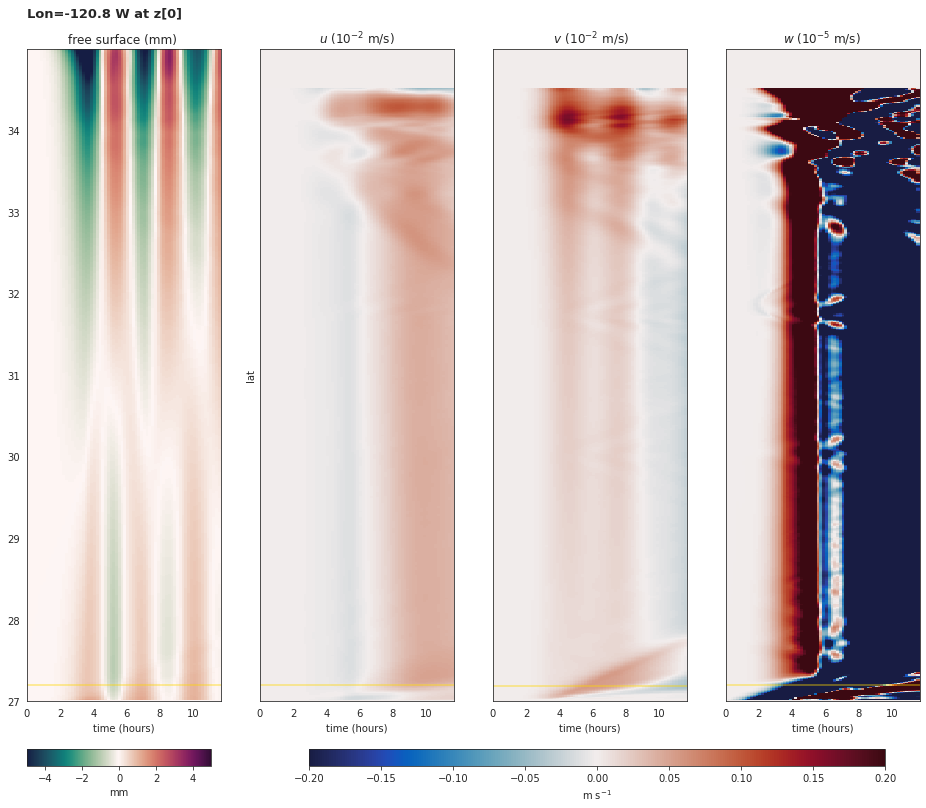

In [13]:
xi = 14
zi = 43
tf = 71
print('%1.1f W' %lon[xi])

Wu = ds['UVEL'][:tf,zi,:,xi] 
Wv = ds['VVEL'][:tf,zi,:,xi]
Ww = ds['WVEL'][:tf,zi,:,xi]
eta = ds['ETAN'][:tf,:,xi]

fig, (ax4,ax0,ax1,ax2) = plt.subplots(1,4,figsize=(16,12), sharey=True, sharex=True)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax4.set_facecolor('tan')

pc = ax4.pcolormesh(time[:tf]/(3600),lat,np.transpose(eta.data)*1E3,
                    cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax4.axhline(lat[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(time[:tf]/(3600),lat,np.transpose(Wu.data*1E2),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axhline(lat[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(time[:tf]/(3600),laty, np.transpose(Wv.data*1E2),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axhline(laty[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(time[:tf]/(3600),lat, np.transpose(Ww.data*1E5),
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axhline(lat[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.37, 0.05, 0.5, 0.02])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='horizontal',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.125, 0.05, 0.16, 0.02])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='horizontal',label='mm',)

ax2.set_xlabel('time (hours)')
ax1.set_xlabel('time (hours)')
ax0.set_xlabel('time (hours)')
ax4.set_xlabel('time (hours)')
ax0.set_ylabel('lat')

ax0.set_title(r'$u$ (10$^{-2}$ m/s)')
ax1.set_title(' $v$ (10$^{-2}$ m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax4.set_title('free surface (mm) ')

plt.text(0,1.05,'Lon=%1.1f W at z[0]' %lon[xi],transform=ax4.transAxes, fontweight='bold', fontsize=13)
plt.show()